# Observaciones



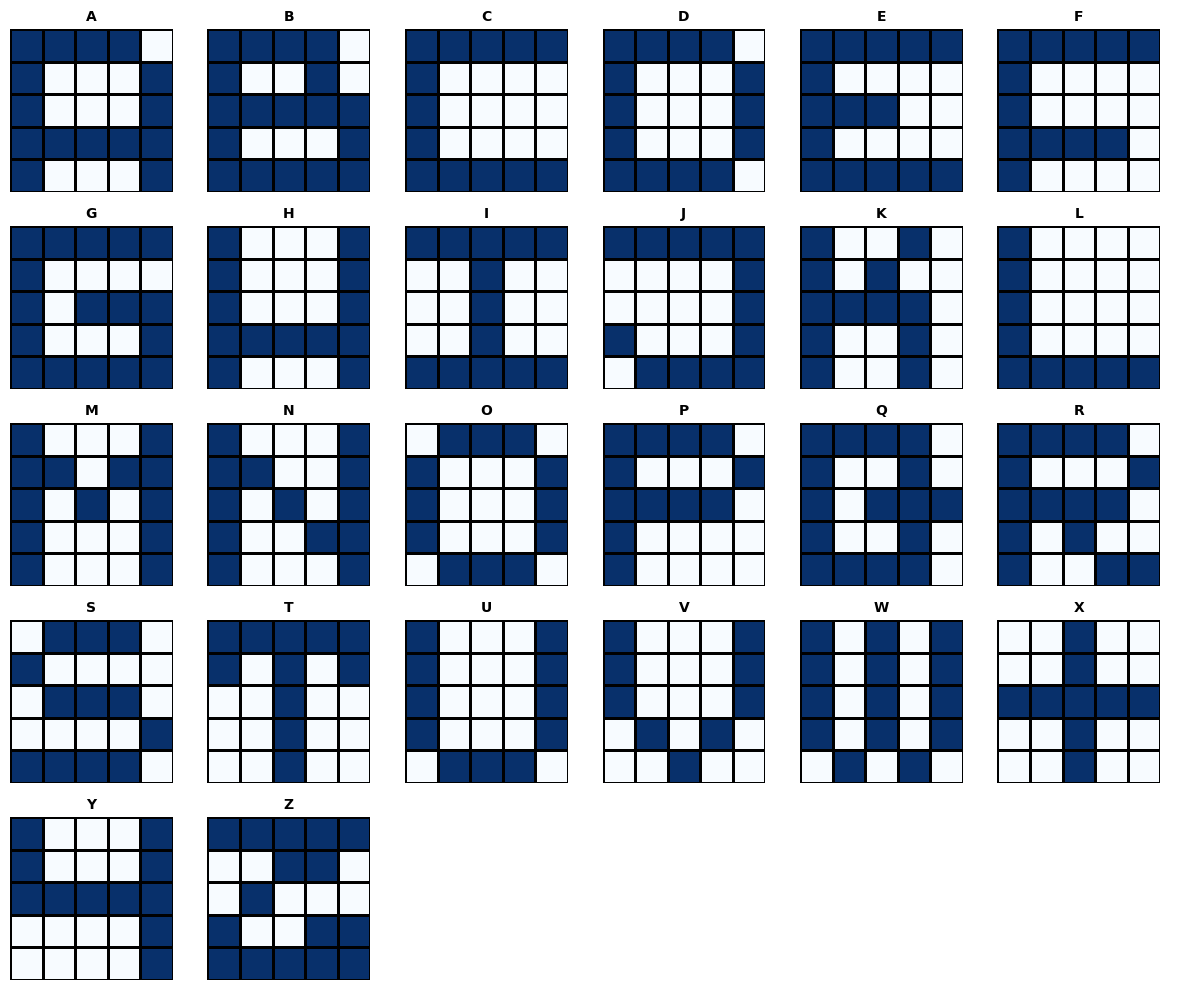

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

def create_letter_plot(letter_grid, ax, cmap='Blues'):
    sns.heatmap(letter_grid, ax=ax, annot=False, cbar=False, cmap=cmap, square=True, linewidth=2, linecolor='black')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

def parse_letters_from_txt(filepath):
    letters = {}
    current_grid = np.ones((5, 5)) * -1  # Initialize a blank grid
    row_idx = 0
    letter_name = None
    
    with open(filepath) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('='):
                # Save the current letter if one exists
                if letter_name and row_idx == 5:
                    letters[letter_name] = current_grid.copy()
                letter_name = line[2:].strip()
                current_grid = np.ones((5, 5)) * -1
                row_idx = 0
            elif line and row_idx < 5:
                for col_idx, char in enumerate(line[:5]):
                    current_grid[row_idx][col_idx] = 1 if char == '*' else -1
                row_idx += 1
        if letter_name and row_idx == 5:
            letters[letter_name] = current_grid
    return letters

def display_alphabet(letters_dict, cmap='Blues', columns=6):
    rows = (len(letters_dict) + columns - 1) // columns
    fig, axes = plt.subplots(rows, columns, figsize=(columns * 2, rows * 2))
    fig.set_dpi(100)
    axes = axes.flatten()
    
    for idx, (letter, grid) in enumerate(letters_dict.items()):
        create_letter_plot(grid.reshape(5, 5), ax=axes[idx], cmap=cmap)
        axes[idx].set_title(letter, fontsize=10, weight='bold')
    
    for i in range(len(letters_dict), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def draw_word(word, filepath="../data/letters_cool.txt", cmap='Blues'):
    # Convert the word to uppercase and split it into individual letters
    letters = [char.upper() for char in word]
    
    # Pass the letters as arguments to the draw function using unpacking
    draw(*letters, filepath=filepath, cmap=cmap)

def draw(*letters, filepath="../data/letters_cool.txt", cmap='Blues'):
    letters_dict = parse_letters_from_txt(filepath)
    num_letters = len(letters)
    fig, axes = plt.subplots(1, num_letters, figsize=(num_letters * 2, 4))
    if num_letters == 1:
        axes = [axes]
    
    for idx, letter in enumerate(letters):
        if letter in letters_dict:
            create_letter_plot(letters_dict[letter].reshape(5, 5), ax=axes[idx], cmap=cmap)
            axes[idx].set_title(letter.upper(), fontsize=10, weight='bold')
        else:
            print(f"Letter '{letter}' not found.")
    
    plt.tight_layout()
    plt.show()


def compute_orthogonality_matrix(patterns):
    n = len(patterns)
    ortho_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                ortho_matrix[i, j] = np.abs(np.dot(patterns[i], patterns[j]))
    return ortho_matrix

# Example usage
letters = parse_letters_from_txt("../data/letters_cool.txt")
inversed_letters = {k: -v for k, v in letters.items()}
display_alphabet(letters)  # Display full alphabet


# Best 4-group combo    

In [18]:
import numpy as np
import itertools
import pandas as pd

# Flatten each letter matrix to a 1D array for dot product comparisons
flat_letters = {
    k: m.flatten() for k, m in letters.items()
}

flat_inversed_letters = {
    k: m.flatten() for k, m in inversed_letters.items()
}

# Create all combinations of 4-letter groups
all_groups = itertools.combinations(flat_letters.keys(), r=4)

# Lists to store results for each group, including the six unique values of the ortho_matrix
group_data = []

for g in all_groups:
    # Form a matrix with flattened letters for the current group
    group_matrix = np.array([flat_letters[k] for k in g])
    # Calculate the orthogonality matrix (orto_matrix) for the group
    orto_matrix = compute_orthogonality_matrix(group_matrix)
    # Extract the six unique off-diagonal values from orto_matrix
    unique_values = [
        int(orto_matrix[0, 1]), int(orto_matrix[0, 2]), int(orto_matrix[0, 3]),
        int(orto_matrix[1, 2]), int(orto_matrix[1, 3]), int(orto_matrix[2, 3])
    ]
    
    # Calculate average dot product (excluding diagonal)
    n = orto_matrix.shape[0]
    avg_dot = (np.sum(orto_matrix) - np.sum(np.diag(orto_matrix))) / (n * (n - 1))
    
    # Find maximum dot product and its count
    max_v = np.max(orto_matrix[np.triu_indices(n, k=1)])
    max_count = np.sum(orto_matrix[np.triu_indices(n, k=1)] == max_v)
    
    # Append data for this group
    group_data.append({
        'grupo': g,
        '|<>| medio': avg_dot,
        '|<>| max': (max_v, max_count),
        'unique_values': unique_values,
        'orto_matrix': orto_matrix,
        'group_matrix': group_matrix
    })

# Create a DataFrame from the collected group data and sort by '|<>| medio'
df_groups = pd.DataFrame(group_data).sort_values(by='|<>| medio', ascending=True)


avg_dot_product = list(zip(df_groups['|<>| medio'], df_groups['grupo'], df_groups['unique_values']))
max_dot_product = list(zip(df_groups['|<>| max'], df_groups['grupo'], df_groups['unique_values']))



### Matriz total de ortogonalidad

- Muestra todas las posibles combinaciones de letras  y calcula su ortogonalidad
- Mientras más alto es el número, más parecidos son
- 1 - X entonces mientras más más bajo, más parecidos, entonces buscamos valores cercanos a 1

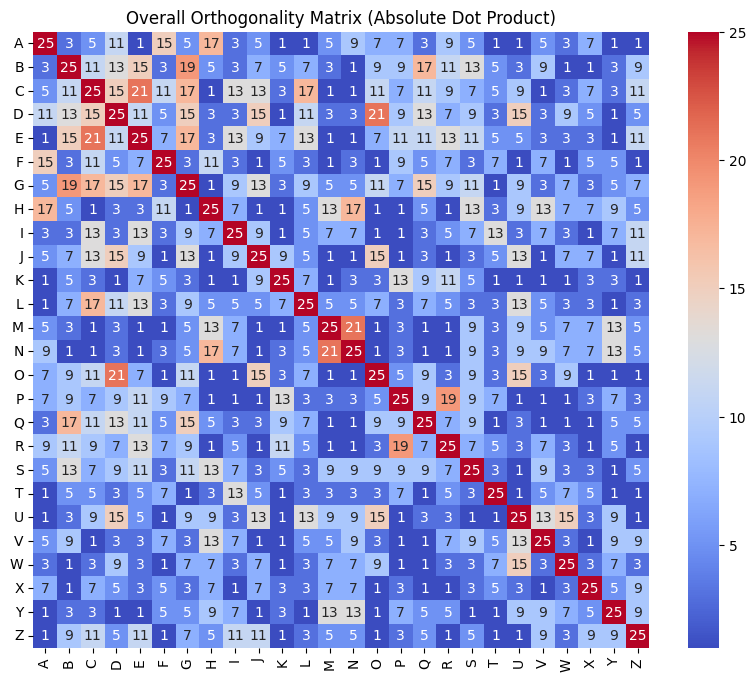

In [19]:

# Para no tocar otras variables
flat_letters_list = list(flat_letters.keys())
vectors = [flat_letters[k] for k in letters]

n_letters = len(letters)
overall_ortho_matrix = np.zeros((n_letters, n_letters))

for i in range(n_letters):
    for j in range(n_letters):
        
            overall_ortho_matrix[i, j] = np.abs(np.dot(vectors[i], vectors[j]))  

plt.figure(figsize=(10, 8))
sns.heatmap(overall_ortho_matrix, annot=True, fmt=".0f", cmap='coolwarm', square=True)
plt.title("Overall Orthogonality Matrix (Absolute Dot Product)")
plt.xticks(ticks=np.arange(n_letters) + 0.5, labels=flat_letters_list, rotation=90)
plt.yticks(ticks=np.arange(n_letters) + 0.5, labels=flat_letters_list, rotation=0)
plt.show()


/tmp/ipykernel_88773/3400795500.py:13: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, linkage_method)


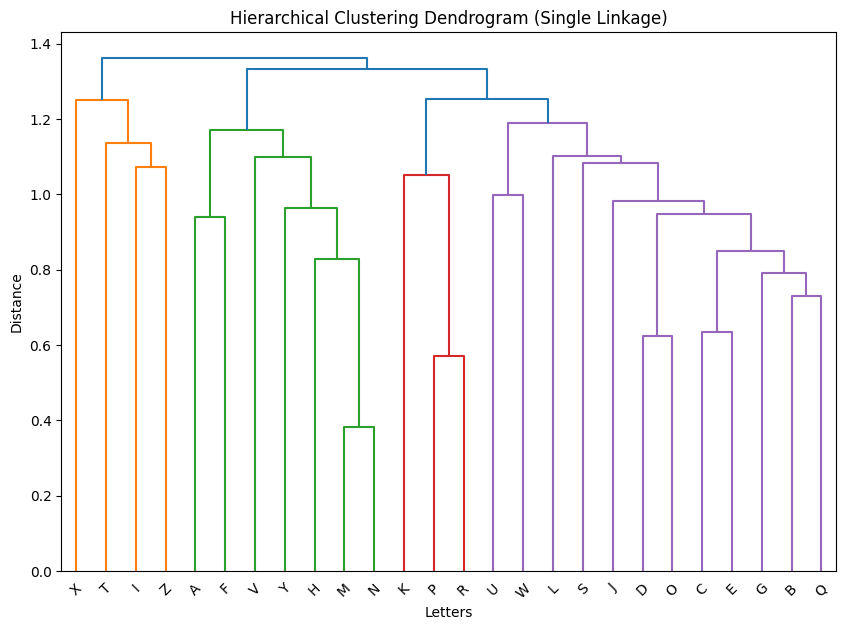

Cluster 1: ['I', 'T', 'X', 'Z']
Cluster 2: ['A', 'F', 'H', 'M', 'N', 'V', 'Y']
Cluster 3: ['K', 'P', 'R']
Cluster 4: ['B', 'C', 'D', 'E', 'G', 'J', 'L', 'O', 'Q', 'S', 'U', 'W']


In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)


# Normalize and compute distance matrix
norm_ortho_matrix = overall_ortho_matrix / np.max(np.abs(overall_ortho_matrix))
distance_matrix = 1 - norm_ortho_matrix

# Choose linkage method: 'single', 'ward', or 'centroid'
linkage_method = 'single'
linked = linkage(distance_matrix, linkage_method)

# Determine the color threshold manually to get 4 clusters
num_clusters = 4
color_threshold = linked[-(num_clusters-1), 2]  # Set threshold for 4 clusters

# Plot dendrogram with color threshold to highlight 4 clusters
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    labels=flat_letters_list,
    orientation='top',
    color_threshold=color_threshold
)
plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method.capitalize()} Linkage)")
plt.xlabel('Letters')
plt.ylabel('Distance')
plt.show()

# Create clusters by applying fcluster with `maxclust=4`
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Group letters by cluster
clustered_letters = {i: [] for i in range(1, num_clusters + 1)}
for letter, cluster_id in zip(flat_letters_list, clusters):
    clustered_letters[cluster_id].append(letter)

# Print letters in each cluster
for i in range(1, num_clusters + 1):
    print(f"Cluster {i}: {clustered_letters[i]}")

# Function to pick `n` letters from different clusters in a round-robin manner
def get_most_orthogonal_n(n, clustered_letters):
    np.random.seed(42)

    # Copy of clusters to remove letters as they are selected
    cluster_copy = {cluster_id: letters.copy() for cluster_id, letters in clustered_letters.items()}
    selected_letters = []

    # Cycle through clusters and pick letters until we have `n` letters
    cluster_keys = list(cluster_copy.keys())
    cluster_index = 0

    while len(selected_letters) < n:
        # Get the current cluster and check if it has letters left
        current_cluster = cluster_keys[cluster_index]
        if cluster_copy[current_cluster]:  # If letters are available in this cluster
            # Pick a random letter from the current cluster
            letter = np.random.choice(cluster_copy[current_cluster])
            selected_letters.append(letter)
            cluster_copy[current_cluster].remove(letter)  # Remove it to avoid duplicates

        # Move to the next cluster (round-robin)
        cluster_index = (cluster_index + 1) % len(cluster_keys)

    return selected_letters

def get_least_orthogonal_n(n, clustered_letters):
    selected_letters = []
    # Sort clusters by size in descending order and iterate over them
    sorted_clusters = sorted(clustered_letters.keys(), key=lambda k: len(clustered_letters[k]), reverse=True)
    
    for cluster_id in sorted_clusters:
        # Extend selected letters with letters from the current cluster
        selected_letters.extend(clustered_letters[cluster_id])
        # Stop if we've reached the desired number of letters
        if len(selected_letters) >= n:
            break
    return selected_letters[:n]




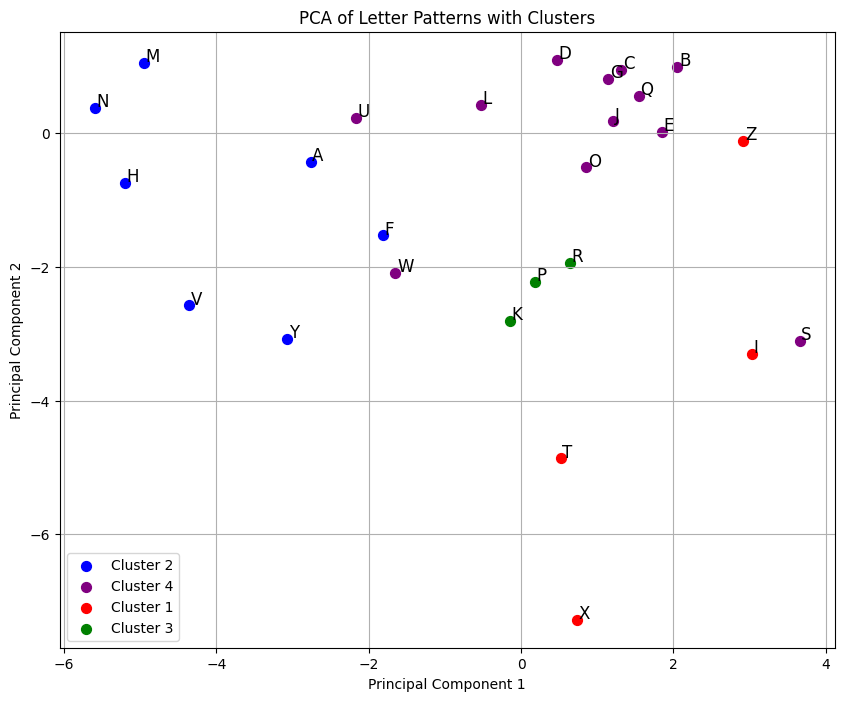

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from core.pca import PCA

# Assuming `letters` dictionary with flattened 5x5 letter patterns and labels list is already available.
# Flatten the 5x5 arrays into 25-dimensional vectors and collect labels
labels = list(letters.keys())
data = np.array([letters[label].flatten() for label in labels])

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca.fit(data)
principal_components = pca.transform(data)

# Define cluster colors
cluster_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple'
}

# Assign each letter its cluster color based on `clustered_letters`
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    x, y = principal_components[i]
    # Find the cluster for this label
    cluster_id = next((cid for cid, letters in clustered_letters.items() if label in letters), None)
    if cluster_id:
        color = cluster_colors[cluster_id]
        plt.scatter(x, y, color=color, s=50, label=f"Cluster {cluster_id}" if i == labels.index(label) else "")
        plt.text(x + 0.02, y + 0.02, label, fontsize=12)

# Unique legend for each cluster
handles, unique_labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(unique_labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.title('PCA of Letter Patterns with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [40]:
import pandas as pd

# Assuming avg_dot_product and max_dot_product contain tuples in correct format

# Creating the DataFrame with the sorted average dot product
df = pd.DataFrame(sorted(avg_dot_product), columns=["|<>| medio", "grupo", "unique_values"])
# Display the top 15 rows with formatted average dot product values
display(df.head(15).style.format({'|<>| medio': "{:.2f}"}).hide(axis='index'))

# Displaying the last 5 rows of the DataFrame with formatted values
display(df.tail(15).style.format({'|<>| medio': "{:.2f}"}).hide(axis='index'))

# Creating the DataFrame with the sorted max dot product
df2 = pd.DataFrame(sorted(max_dot_product), columns=["|<>| max", "grupo", "unique_values"])

# Ensure the 'unique_values' are strings for display consistency
df2['unique_values'] = df2['unique_values'].astype(str)

# Display the top 15 rows with formatted max dot product values
display(df2.head(15).style.format({
    '|<>| max': lambda x: f'max: {x[0]:.0f} | count: {x[1]:.0f}' if isinstance(x, tuple) else f"{x}",
}).hide(axis='index'))

# Merging the two DataFrames on the 'grupo' column
df3 = df2.merge(df, on="grupo")

# Rename or select only one of the unique_values columns to avoid confusion
df3['unique_values'] = df3['unique_values_x']  # or use 'unique_values_y' if preferred
df3 = df3[['|<>| max', '|<>| medio', 'grupo', 'unique_values']]

# Sorting by the '|<>| medio' column
df3 = df3.sort_values(by='|<>| medio', ascending=True)

# Display the top 15 rows of the merged DataFrame with formatted values
display(df3.head(150).style.format({
    '|<>| max': lambda x: f'max: {x[0]:.0f} | count: {x[1]:.0f}' if isinstance(x, tuple) else f"{x}",
    '|<>| medio': "{:.2f}",
    'unique_values': "{}"
}).hide(axis='index'))

# Displaying the last 5 rows of the merged DataFrame with formatted values
display(df3.tail(15).style.format({
    '|<>| max': lambda x: f'max: {x[0]:.0f} | count: {x[1]:.0f}' if isinstance(x, tuple) else f"{x}",
    '|<>| medio': "{:.2f}",
    'unique_values': "{}"
}).hide(axis='index'))


|<>| medio,grupo,unique_values
1.00,"('A', 'K', 'T', 'U')","[1, 1, 1, 1, 1, 1]"
1.00,"('A', 'K', 'T', 'Z')","[1, 1, 1, 1, 1, 1]"
1.00,"('A', 'K', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
1.00,"('A', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
1.00,"('K', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
1.33,"('A', 'K', 'T', 'Y')","[1, 1, 1, 1, 3, 1]"
1.33,"('A', 'L', 'T', 'Y')","[1, 1, 1, 3, 1, 1]"
1.67,"('A', 'E', 'T', 'Y')","[1, 1, 1, 5, 1, 1]"
1.67,"('A', 'I', 'K', 'U')","[3, 1, 1, 1, 3, 1]"
1.67,"('A', 'K', 'W', 'Z')","[1, 3, 1, 1, 1, 3]"


|<>| medio,grupo,unique_values
15.00,"('B', 'C', 'D', 'G')","[11, 13, 19, 15, 17, 15]"
15.00,"('B', 'C', 'G', 'Q')","[11, 19, 17, 17, 11, 15]"
15.00,"('B', 'D', 'E', 'G')","[13, 15, 19, 11, 15, 17]"
15.00,"('C', 'D', 'G', 'O')","[15, 17, 11, 15, 21, 11]"
15.00,"('C', 'D', 'J', 'O')","[15, 13, 11, 15, 21, 15]"
15.00,"('C', 'E', 'G', 'I')","[21, 17, 13, 17, 13, 9]"
15.00,"('C', 'E', 'G', 'J')","[21, 17, 13, 17, 9, 13]"
15.00,"('D', 'G', 'J', 'O')","[15, 15, 21, 13, 11, 15]"
15.33,"('B', 'D', 'G', 'Q')","[13, 19, 17, 15, 13, 15]"
15.33,"('C', 'E', 'G', 'Q')","[21, 17, 11, 17, 11, 15]"


|<>| max,grupo,unique_values
max: 1 | count: 6,"('A', 'K', 'T', 'U')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,"('A', 'K', 'T', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,"('A', 'K', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,"('A', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,"('K', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 3 | count: 1,"('A', 'K', 'T', 'Y')","[1, 1, 1, 1, 3, 1]"
max: 3 | count: 1,"('A', 'L', 'T', 'Y')","[1, 1, 1, 3, 1, 1]"
max: 3 | count: 2,"('A', 'I', 'K', 'U')","[3, 1, 1, 1, 3, 1]"
max: 3 | count: 2,"('A', 'K', 'W', 'Z')","[1, 3, 1, 1, 1, 3]"
max: 3 | count: 2,"('A', 'L', 'T', 'Z')","[1, 1, 1, 3, 3, 1]"


|<>| max,|<>| medio,grupo,unique_values
max: 1 | count: 6,1.00,"('A', 'K', 'T', 'U')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,1.00,"('A', 'K', 'T', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,1.00,"('A', 'K', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,1.00,"('A', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 1 | count: 6,1.00,"('K', 'T', 'U', 'Z')","[1, 1, 1, 1, 1, 1]"
max: 3 | count: 1,1.33,"('A', 'K', 'T', 'Y')","[1, 1, 1, 1, 3, 1]"
max: 3 | count: 1,1.33,"('A', 'L', 'T', 'Y')","[1, 1, 1, 3, 1, 1]"
max: 5 | count: 1,1.67,"('F', 'K', 'U', 'Z')","[5, 1, 1, 1, 1, 1]"
max: 5 | count: 1,1.67,"('A', 'E', 'T', 'Y')","[1, 1, 1, 5, 1, 1]"
max: 3 | count: 2,1.67,"('Q', 'V', 'W', 'X')","[1, 1, 1, 3, 1, 3]"


|<>| max,|<>| medio,grupo,unique_values
max: 21 | count: 1,15.00,"('C', 'E', 'G', 'I')","[21, 17, 13, 17, 13, 9]"
max: 21 | count: 1,15.00,"('C', 'E', 'G', 'J')","[21, 17, 13, 17, 9, 13]"
max: 19 | count: 1,15.00,"('B', 'C', 'D', 'G')","[11, 13, 19, 15, 17, 15]"
max: 21 | count: 1,15.00,"('C', 'D', 'J', 'O')","[15, 13, 11, 15, 21, 15]"
max: 21 | count: 1,15.00,"('D', 'G', 'J', 'O')","[15, 15, 21, 13, 11, 15]"
max: 19 | count: 1,15.00,"('B', 'C', 'G', 'Q')","[11, 19, 17, 17, 11, 15]"
max: 21 | count: 1,15.00,"('C', 'D', 'G', 'O')","[15, 17, 11, 15, 21, 11]"
max: 19 | count: 1,15.00,"('B', 'D', 'E', 'G')","[13, 15, 19, 11, 15, 17]"
max: 21 | count: 1,15.33,"('C', 'E', 'G', 'Q')","[21, 17, 11, 17, 11, 15]"
max: 19 | count: 1,15.33,"('B', 'D', 'G', 'Q')","[13, 19, 17, 15, 13, 15]"


# Analysis part

- MSE during training
- Energy during training
- Accuracy
- Error vs number of memories
- Noise Tolerance ( noise levels vs yes/no)

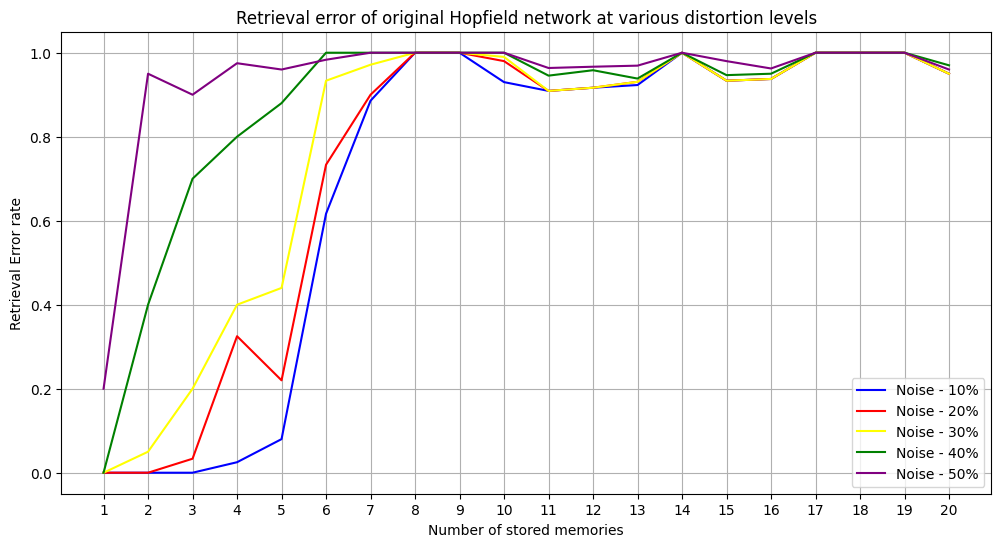

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from core.hopfield import Hopfield


np.random.seed(42)

all_letters = list(letters.keys())  

def retrieval_error_rate(hopfield_net, patterns, noise_level, n_variations=10):
    errors = 0
    n_neurons = patterns[0].size
    total_tests = len(patterns) * n_variations

    for pattern in patterns:
        for _ in range(n_variations):
            # Add noise to the pattern
            noisy_pattern = pattern.copy()
            n_flip = int(noise_level * n_neurons)
            flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
            noisy_pattern[flip_indices] *= -1
            
            # Recall the pattern and compare with original
            recovered_pattern, _ = hopfield_net.update(noisy_pattern)
            if not np.array_equal(recovered_pattern, pattern):
                errors += 1

    # Return the average error rate over all variations
    return errors / total_tests

n_neurons = 25
max_patterns = 20  # Maximum number of stored letters to test
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
errors_original = {level: [] for level in noise_levels}

np.random.shuffle(all_letters)

for n_patterns in range(1, max_patterns + 1):
    # Select `n_patterns` letters for training
    
    selected_letters = all_letters[:n_patterns]
    patterns = [letters[letter].flatten() for letter in selected_letters]
    hopfield_net = Hopfield(n_neurons)
    hopfield_net.train(patterns)
    
    # Test for each noise level
    for noise_level in noise_levels:
        error_rate = retrieval_error_rate(hopfield_net, patterns, noise_level)
        errors_original[noise_level].append(error_rate)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for original Hopfield network with different noise levels
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    plt.plot(range(1, max_patterns + 1), errors_original[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")

plt.xlabel("Number of stored memories")
plt.xticks(range(1, max_patterns + 1))
plt.ylabel("Retrieval Error rate")
plt.title("Retrieval error of original Hopfield network at various distortion levels")
plt.legend()
plt.grid(True)
plt.show()


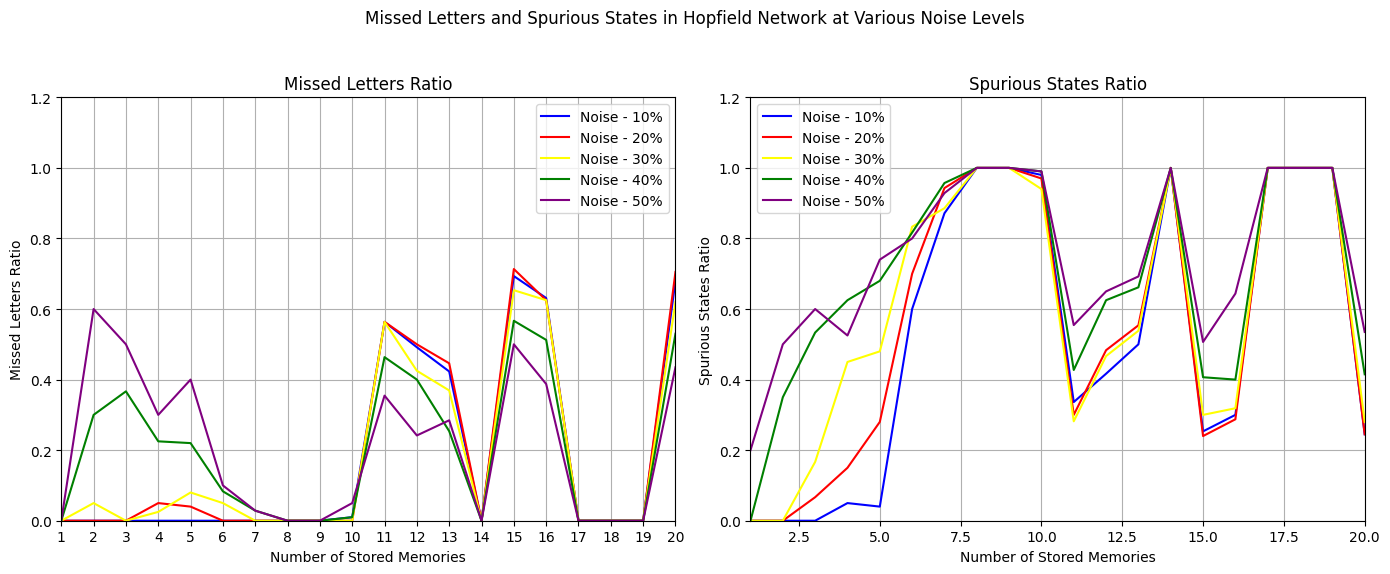

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `Hopfield` and `letters` are already defined, as well as `flattened_letters`
np.random.seed(42)

# List all available letters
all_letters = list(letters.keys())

# Function to count missed letter occurrences
def count_missed_letters(hopfield_net, patterns, noise_level, n_variations=10):
    missed_count = 0
    n_neurons = patterns[0].size

    for pattern in patterns:
        for _ in range(n_variations):
            noisy_pattern = pattern.copy()
            n_flip = int(noise_level * n_neurons)
            flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
            noisy_pattern[flip_indices] *= -1
            
            recovered_pattern, _ = hopfield_net.update(noisy_pattern)
            if not np.array_equal(recovered_pattern, pattern) and any(np.array_equal(recovered_pattern, p) for p in patterns):
                missed_count += 1

    return missed_count 

# Function to count spurious state occurrences
def count_spurious_states(hopfield_net, patterns, noise_level, n_variations=10):
    spurious_count = 0
    n_neurons = patterns[0].size

    for pattern in patterns:
        for _ in range(n_variations):
            noisy_pattern = pattern.copy()
            n_flip = int(noise_level * n_neurons)
            flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
            noisy_pattern[flip_indices] *= -1
            
            recovered_pattern, _ = hopfield_net.update(noisy_pattern)
            if not any(np.array_equal(recovered_pattern, p) for p in patterns):
                spurious_count += 1

    return spurious_count

# Experiment parameters
n_neurons = 25
max_patterns = 20
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
missed_counts = {level: [] for level in noise_levels}
spurious_counts = {level: [] for level in noise_levels}

# Shuffle the list of all letters
np.random.shuffle(all_letters)

# Conduct experiments for increasing numbers of stored patterns
for n_patterns in range(1, max_patterns + 1):
    selected_letters = all_letters[:n_patterns]
    patterns = [flat_letters[letter] for letter in selected_letters]
    
    hopfield_net = Hopfield(n_neurons)
    hopfield_net.train(patterns)
    
    # Test for each noise level
    for noise_level in noise_levels:
        missed_count = count_missed_letters(hopfield_net, patterns, noise_level, 10)
        spurious_count = count_spurious_states(hopfield_net, patterns, noise_level, 10)
        
        # Store results
        missed_counts[noise_level].append(missed_count / (len(patterns) * 10))
        spurious_counts[noise_level].append(spurious_count / (len(patterns) * 10))

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Missed Letters and Spurious States in Hopfield Network at Various Noise Levels")

# Plot for missed letters ratio
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    axs[0].plot(range(1, max_patterns + 1), missed_counts[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")
axs[0].set_title("Missed Letters Ratio")
axs[0].set_xlabel("Number of Stored Memories")
axs[0].set_ylabel("Missed Letters Ratio")
axs[0].set_xlim(1, 20)
axs[0].set_ylim(0, 1.2)
axs[0].set_xticks(range(1, 21))
axs[0].legend()
axs[0].grid(True)

# Plot for spurious states ratio
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    axs[1].plot(range(1, max_patterns + 1), spurious_counts[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")
axs[1].set_title("Spurious States Ratio")
axs[1].set_xlabel("Number of Stored Memories")
axs[1].set_ylabel("Spurious States Ratio")
axs[1].set_xlim(1, 20)
axs[1].set_ylim(0, 1.2)
axs[0].set_xticks(range(1, 21))
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


['X']
['X', 'M']
['X', 'M', 'K']
['X', 'M', 'K', 'U']
['X', 'M', 'K', 'U', 'I']
['X', 'M', 'K', 'U', 'I', 'V']
['X', 'M', 'K', 'U', 'I', 'V', 'P']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A', 'E']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A', 'E', 'Y']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A', 'E', 'Y', 'L']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A', 'E', 'Y', 'L', 'F']
['X', 'M', 'K', 'U', 'I', 'V', 'P', 'S', 'T', 'H', 'R', 'O', 'Z', 'A', 'E', 'Y', 'L', 'F', 'C']
['X', 'M', 'K', 'U', 'I', 'V', 

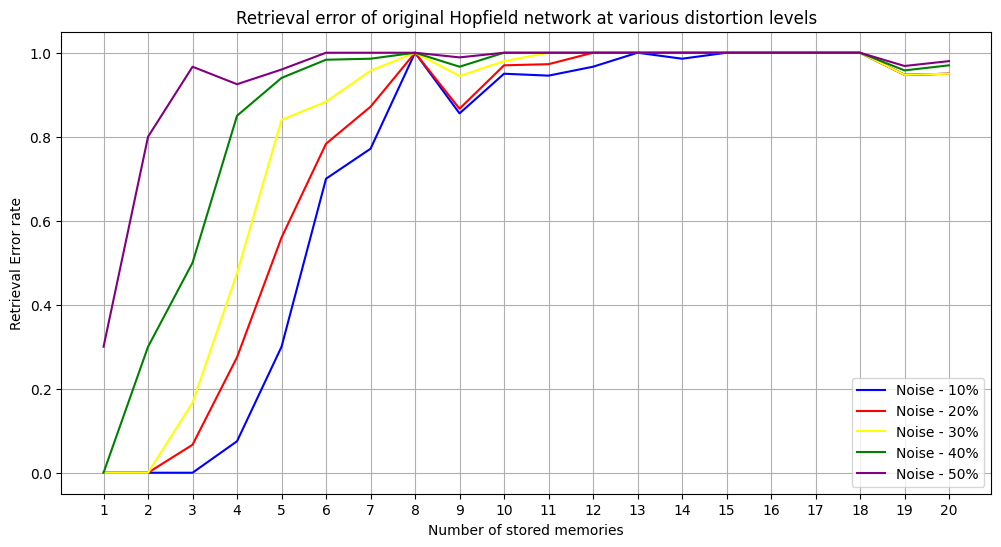

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from core.hopfield import Hopfield
np.random.seed(42)



noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
errors_original = {level: [] for level in noise_levels}

all_letters = get_most_orthogonal_n(26, clustered_letters)

for n_patterns in range(1, max_patterns + 1):
    # Select `n_patterns` letters for training
    print(all_letters[:n_patterns])
    selected_letters = all_letters[:n_patterns]
    patterns = [letters[letter].flatten() for letter in selected_letters]
    hopfield_net = Hopfield(n_neurons)
    hopfield_net.train(patterns)
    
    # Test for each noise level
    for noise_level in noise_levels:
        error_rate = retrieval_error_rate(hopfield_net, patterns, noise_level)
        errors_original[noise_level].append(error_rate)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for original Hopfield network with different noise levels
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    plt.plot(range(1, max_patterns + 1), errors_original[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")

plt.xlabel("Number of stored memories")
plt.xticks(range(1, max_patterns + 1))
plt.ylabel("Retrieval Error rate")
plt.title("Retrieval error of original Hopfield network at various distortion levels")
plt.legend()
plt.grid(True)
plt.show()


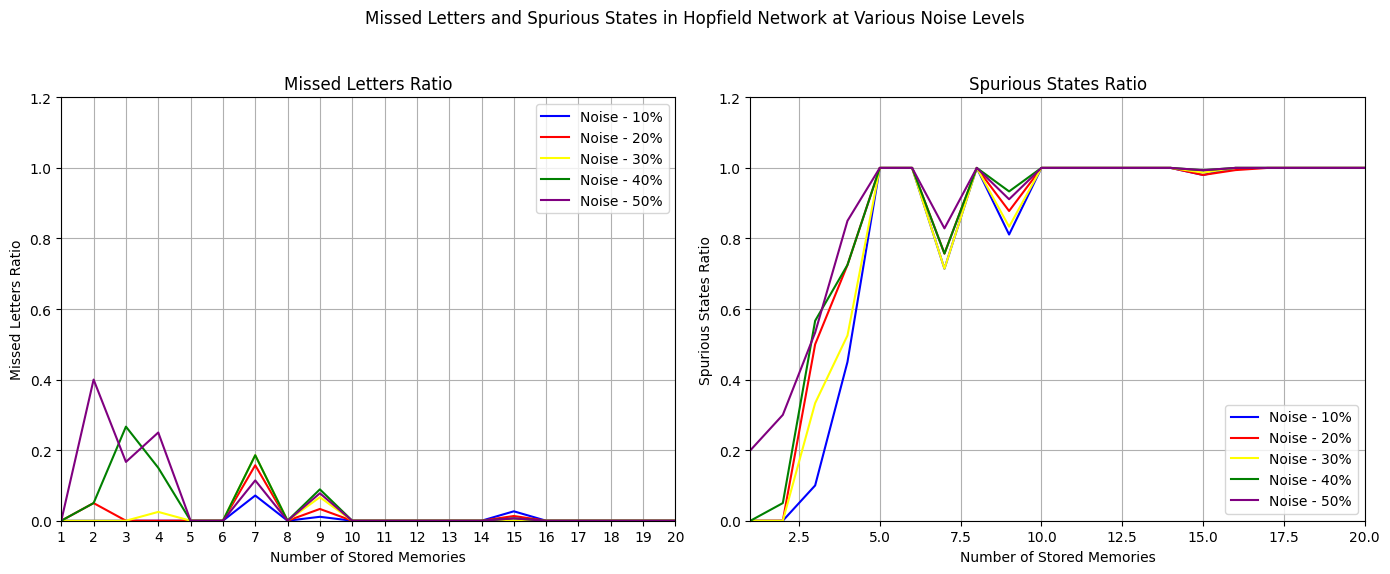

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `Hopfield` and `letters` are already defined, as well as `flattened_letters`
np.random.seed(42)

# List all available letters
all_letters = get_most_orthogonal_n(26, clustered_letters)

# Function to count missed letter occurrences
def count_missed_letters(hopfield_net, patterns, noise_level, n_variations=10):
    missed_count = 0
    n_neurons = patterns[0].size

    for pattern in patterns:
        for _ in range(n_variations):
            noisy_pattern = pattern.copy()
            n_flip = int(noise_level * n_neurons)
            flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
            noisy_pattern[flip_indices] *= -1
            
            recovered_pattern, _ = hopfield_net.update(noisy_pattern)
            if not np.array_equal(recovered_pattern, pattern) and any(np.array_equal(recovered_pattern, p) for p in patterns):
                missed_count += 1

    return missed_count 

# Function to count spurious state occurrences
def count_spurious_states(hopfield_net, patterns, noise_level, n_variations=10):
    spurious_count = 0
    n_neurons = patterns[0].size

    for pattern in patterns:
        for _ in range(n_variations):
            noisy_pattern = pattern.copy()
            n_flip = int(noise_level * n_neurons)
            flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
            noisy_pattern[flip_indices] *= -1
            
            recovered_pattern, _ = hopfield_net.update(noisy_pattern)
            if not any(np.array_equal(recovered_pattern, p) for p in patterns):
                spurious_count += 1

    return spurious_count

# Experiment parameters
n_neurons = 25
max_patterns = 20
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
missed_counts = {level: [] for level in noise_levels}
spurious_counts = {level: [] for level in noise_levels}

# Shuffle the list of all letters
np.random.shuffle(all_letters)

# Conduct experiments for increasing numbers of stored patterns
for n_patterns in range(1, max_patterns + 1):
    selected_letters = all_letters[:n_patterns]
    patterns = [flat_letters[letter] for letter in selected_letters]
    
    hopfield_net = Hopfield(n_neurons)
    hopfield_net.train(patterns)
    
    # Test for each noise level
    for noise_level in noise_levels:
        missed_count = count_missed_letters(hopfield_net, patterns, noise_level, 10)
        spurious_count = count_spurious_states(hopfield_net, patterns, noise_level, 10)
        
        # Store results
        missed_counts[noise_level].append(missed_count / (len(patterns) * 10))
        spurious_counts[noise_level].append(spurious_count / (len(patterns) * 10))

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Missed Letters and Spurious States in Hopfield Network at Various Noise Levels")

# Plot for missed letters ratio
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    axs[0].plot(range(1, max_patterns + 1), missed_counts[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")
axs[0].set_title("Missed Letters Ratio")
axs[0].set_xlabel("Number of Stored Memories")
axs[0].set_ylabel("Missed Letters Ratio")
axs[0].set_xlim(1, 20)
axs[0].set_ylim(0, 1.2)
axs[0].set_xticks(range(1, 21))
axs[0].legend()
axs[0].grid(True)

# Plot for spurious states ratio
for noise_level, color in zip(noise_levels, ['blue', 'red', 'yellow', 'green', 'purple']):
    axs[1].plot(range(1, max_patterns + 1), spurious_counts[noise_level], color=color, label=f"Noise - {int(noise_level * 100)}%")
axs[1].set_title("Spurious States Ratio")
axs[1].set_xlabel("Number of Stored Memories")
axs[1].set_ylabel("Spurious States Ratio")
axs[1].set_xlim(1, 20)
axs[1].set_ylim(0, 1.2)
axs[0].set_xticks(range(1, 21))
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


### MSE during training

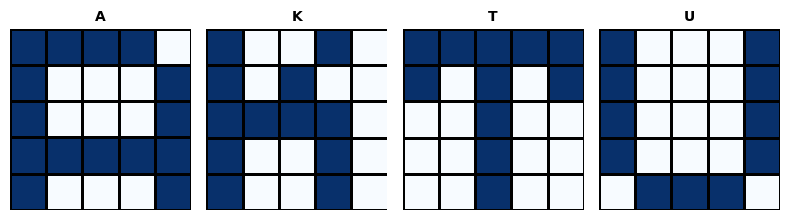

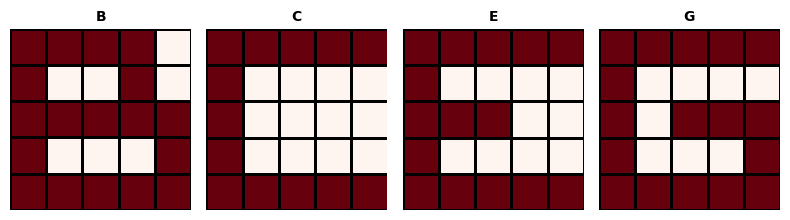

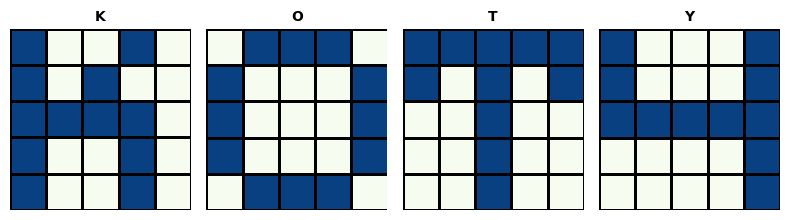

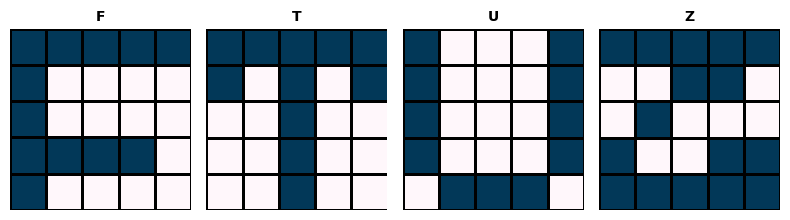

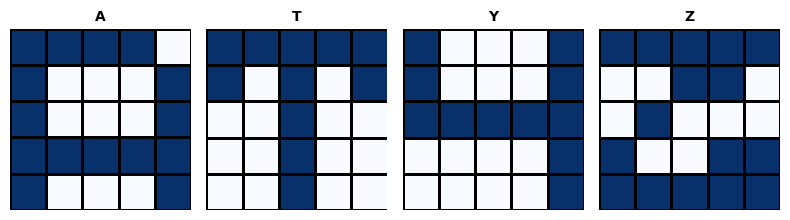

In [39]:
# draw most orthogonal group
draw_word('AKTU')
draw_word('BCEG', cmap='Reds')
draw_word('KOTY', cmap= 'GnBu') # 3, 3, 3, 1, 1, 1 = 2.0
draw_word('FTUZ', cmap = 'PuBu') # 7, 1, 1, 1, 1, 1 = 2.0
draw_word('ATYZ') # 2.3 


In [28]:
def recovery_metrics(original_pattern, recovered_pattern):
    # Reconstruction accuracy
    accuracy = np.sum(original_pattern == recovered_pattern) / len(original_pattern) * 100

    # Hamming distance
    hamming_distance = np.sum(original_pattern != recovered_pattern)

    cosine_similarity = np.dot(original_pattern, recovered_pattern) / (np.linalg.norm(original_pattern) * np.linalg.norm(recovered_pattern))
    
    return accuracy, hamming_distance, cosine_similarity



=================== Analyzing set: ['A', 'K', 'T', 'U']
Pattern 'A' recovery metrics:
  - Accuracy: 48.00%
  - Hamming Distance: 13
  - Cosine Similarity: -0.0400


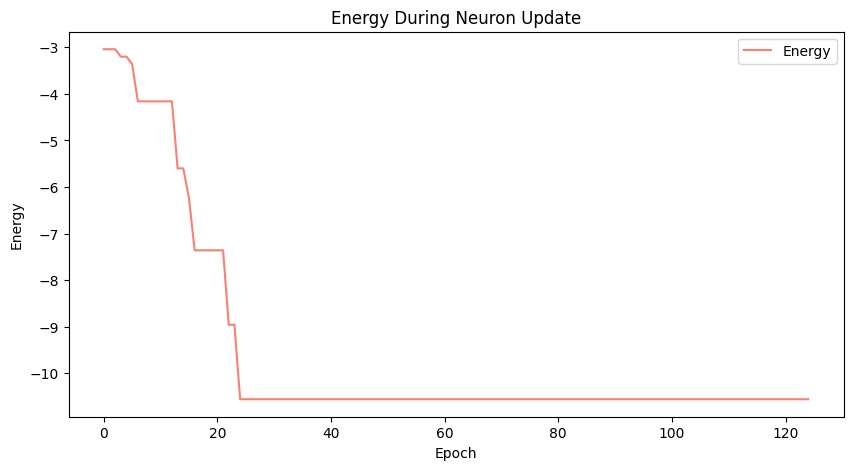

-10.56
-10.56


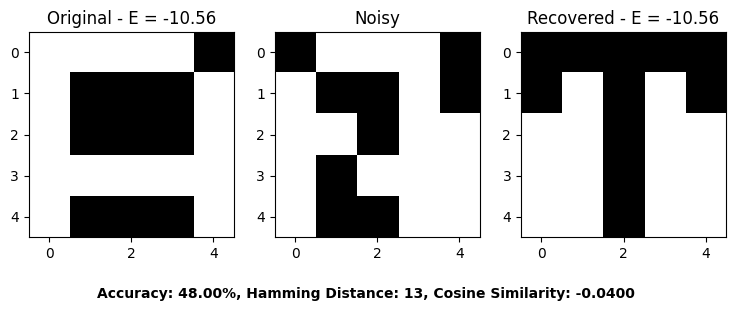

Pattern 'K' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


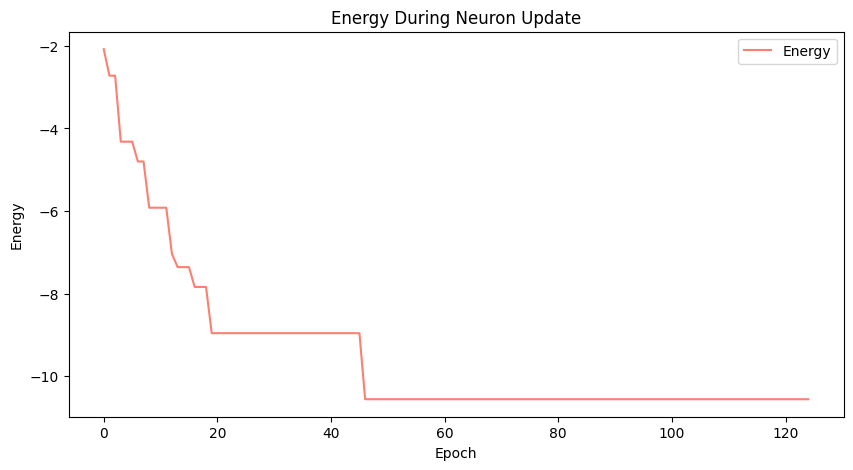

-10.56
-10.56


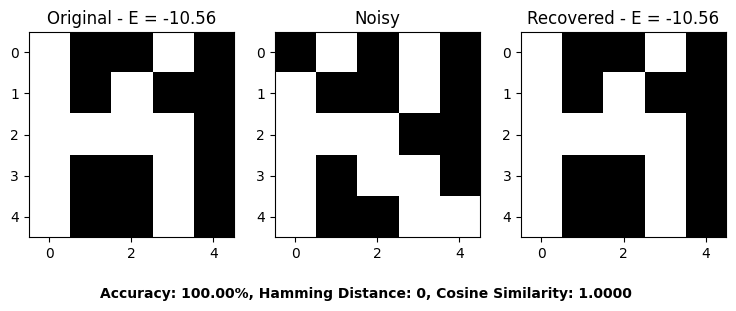

Pattern 'T' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


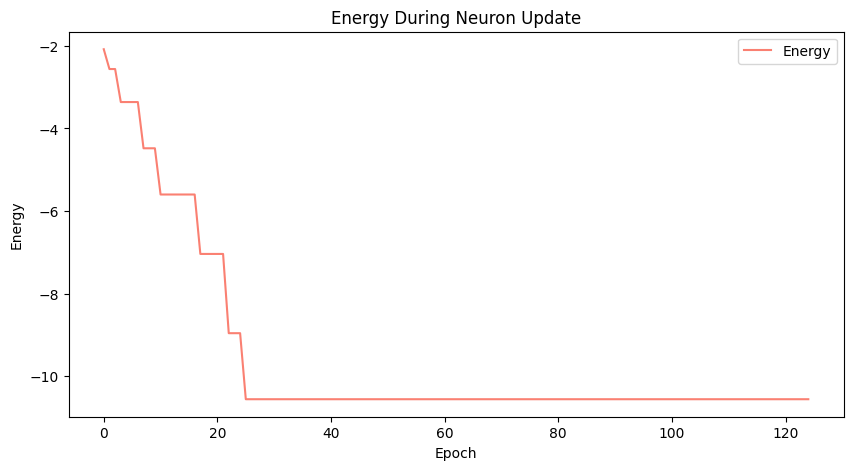

-10.56
-10.56


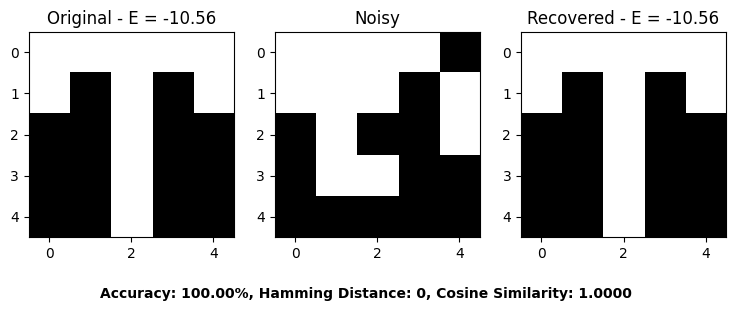

Pattern 'U' recovery metrics:
  - Accuracy: 68.00%
  - Hamming Distance: 8
  - Cosine Similarity: 0.3600


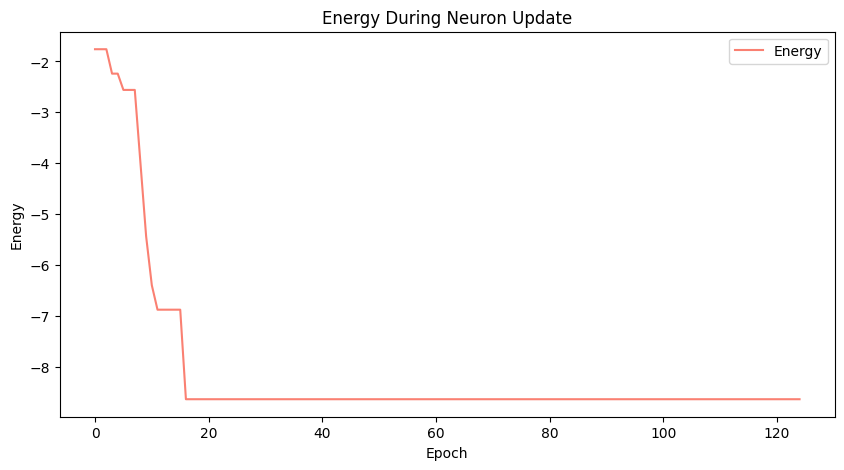

-10.56
-8.64


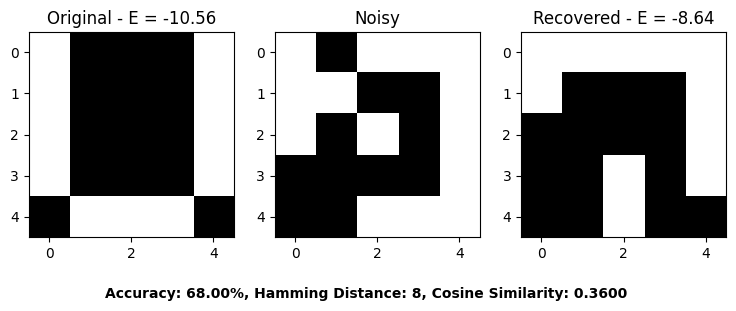

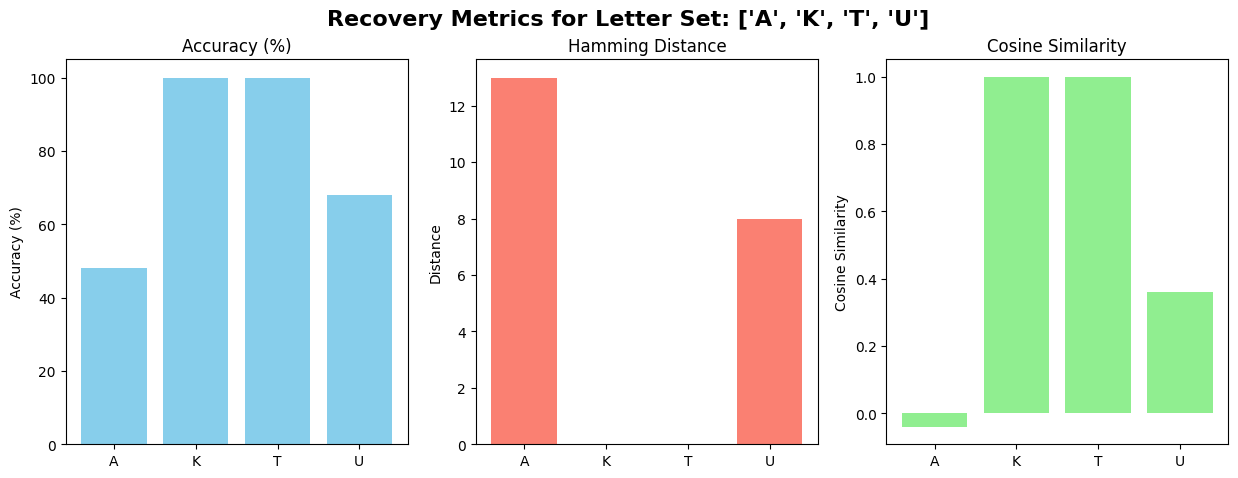


=================== Analyzing set: ['B', 'C', 'E', 'G']
Pattern 'B' recovery metrics:
  - Accuracy: 88.00%
  - Hamming Distance: 3
  - Cosine Similarity: 0.7600


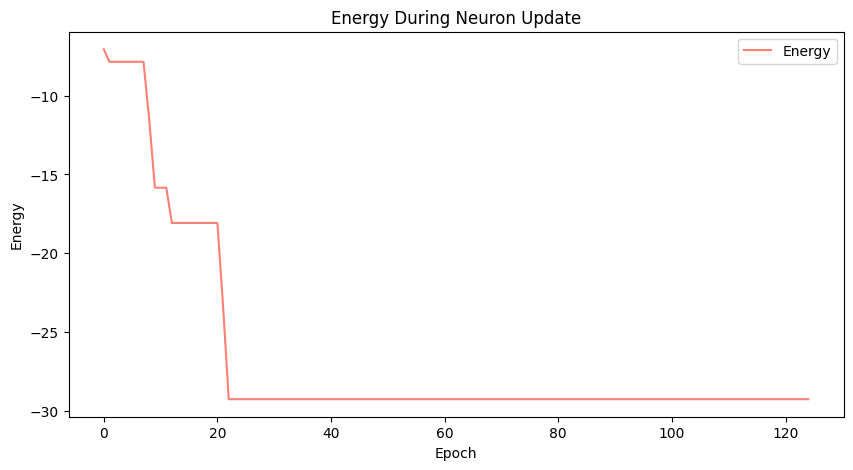

-24.640000000000008
-29.280000000000005


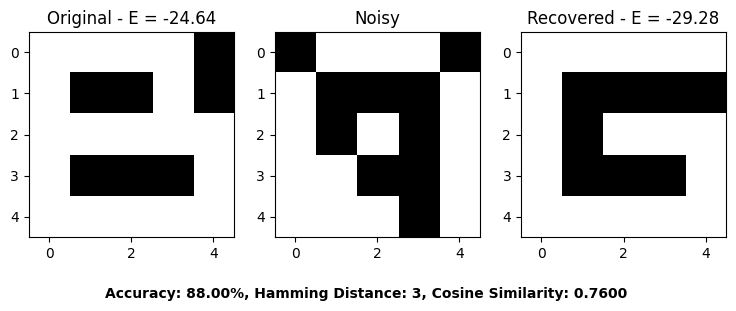

Pattern 'C' recovery metrics:
  - Accuracy: 96.00%
  - Hamming Distance: 1
  - Cosine Similarity: 0.9200


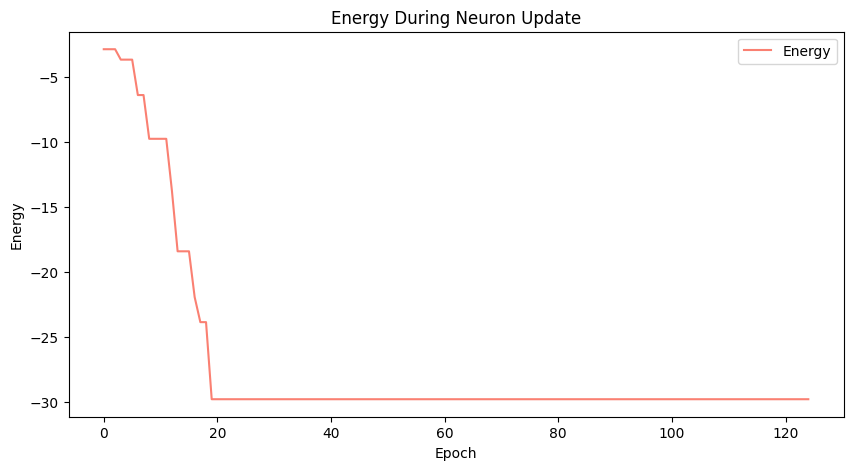

-27.51999999999999
-29.760000000000005


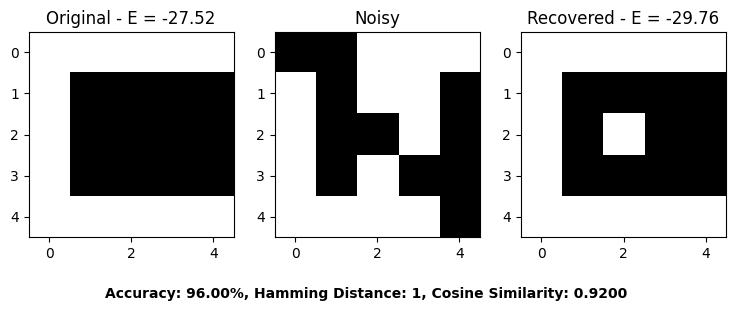

Pattern 'E' recovery metrics:
  - Accuracy: 96.00%
  - Hamming Distance: 1
  - Cosine Similarity: 0.9200


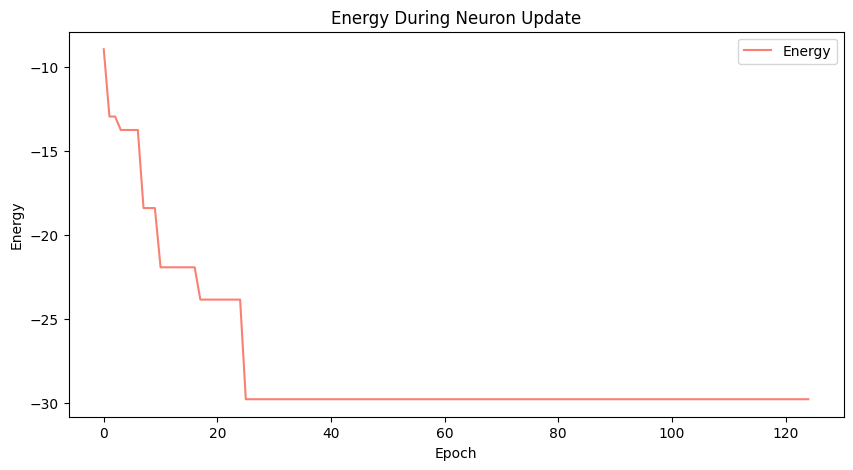

-29.6
-29.760000000000005


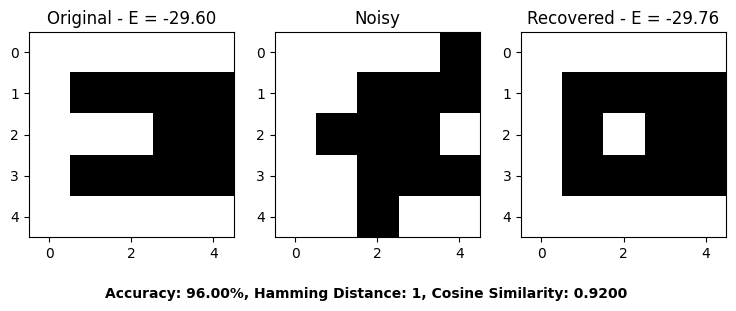

Pattern 'G' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


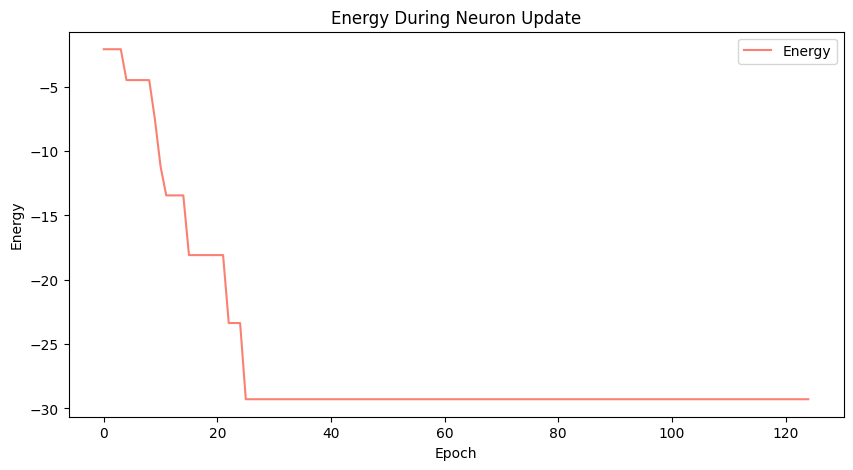

-29.280000000000005
-29.280000000000005


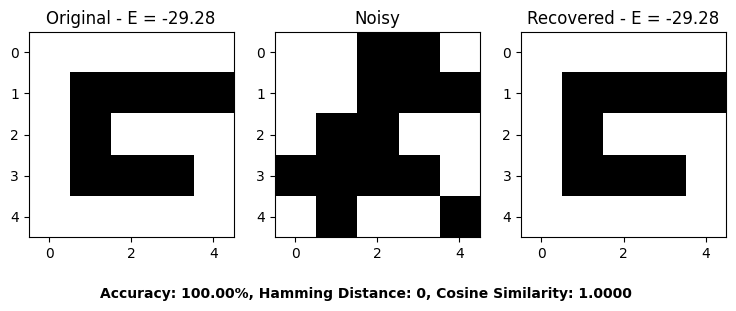

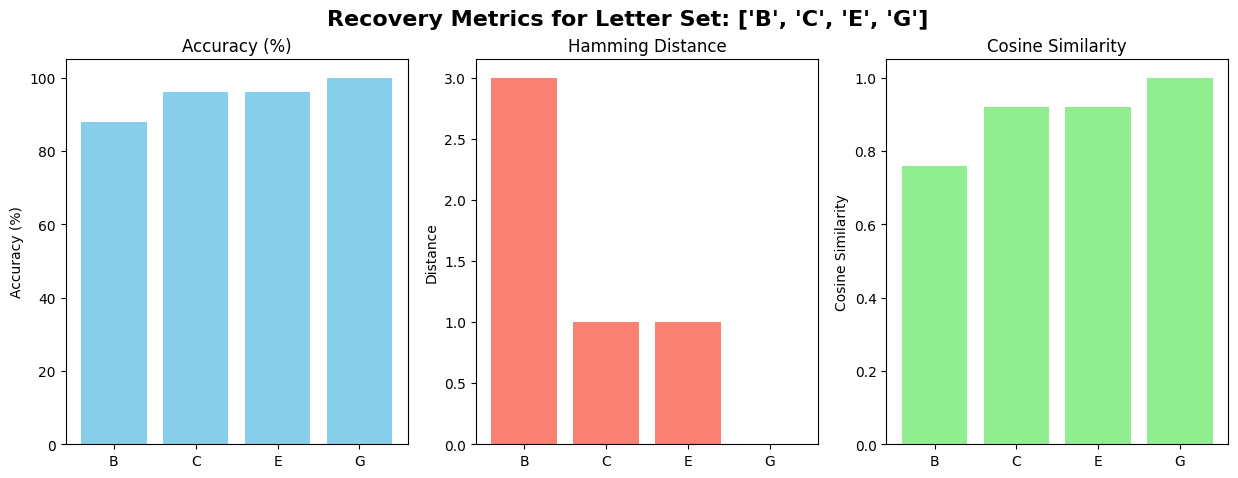


=================== Analyzing set: ['K', 'O', 'T', 'Y']
Pattern 'K' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


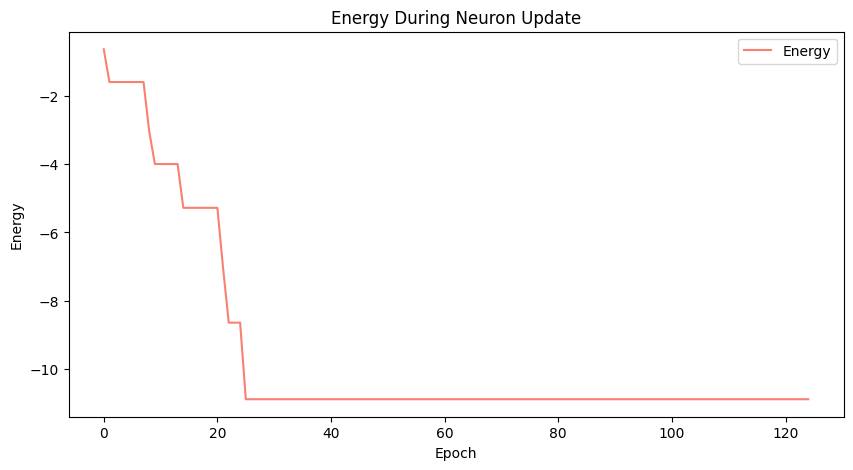

-10.88
-10.88


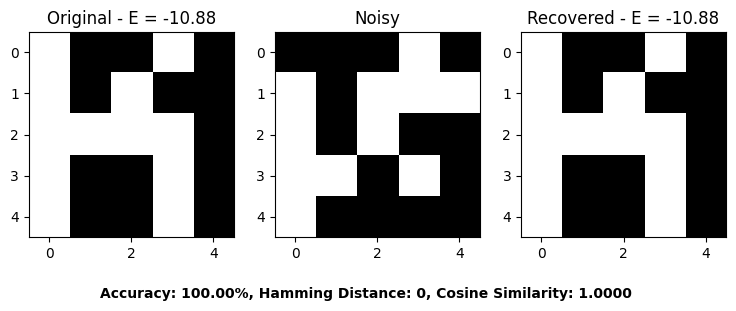

Pattern 'O' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


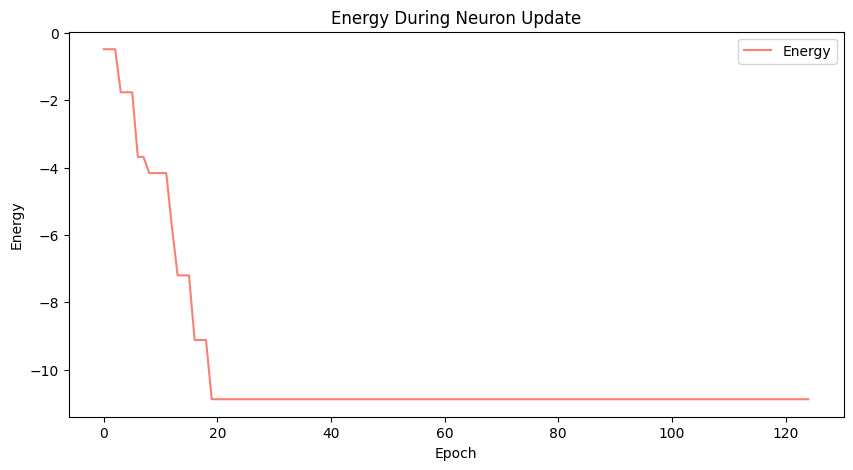

-10.88
-10.88


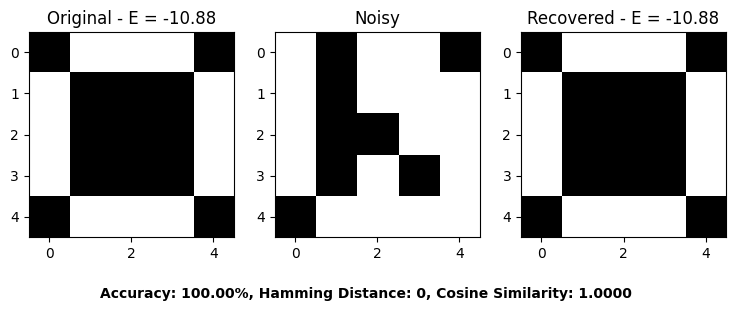

Pattern 'T' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


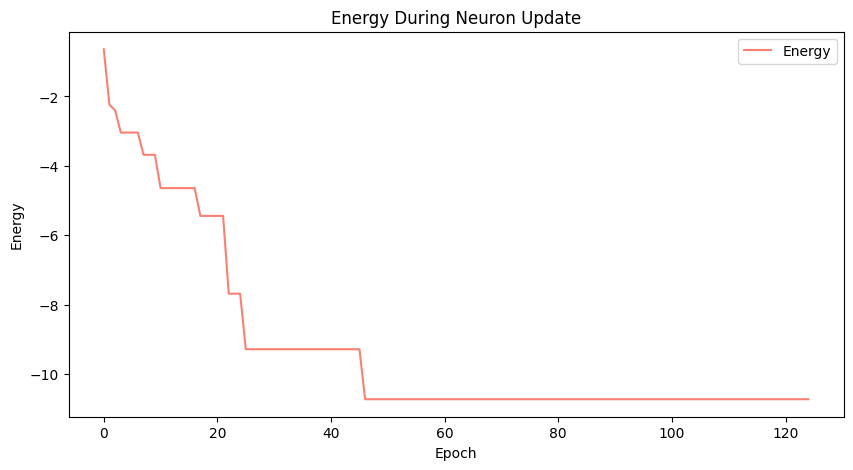

-10.72
-10.72


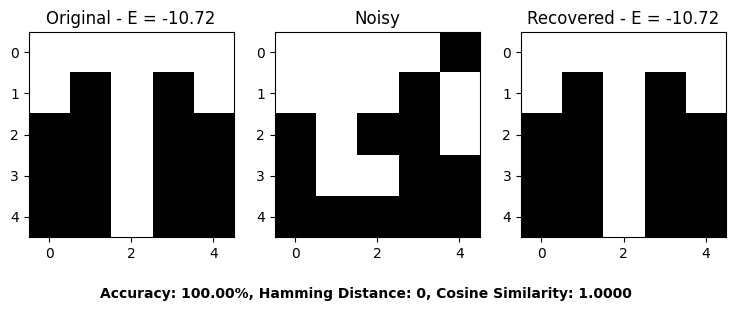

Pattern 'Y' recovery metrics:
  - Accuracy: 48.00%
  - Hamming Distance: 13
  - Cosine Similarity: -0.0400


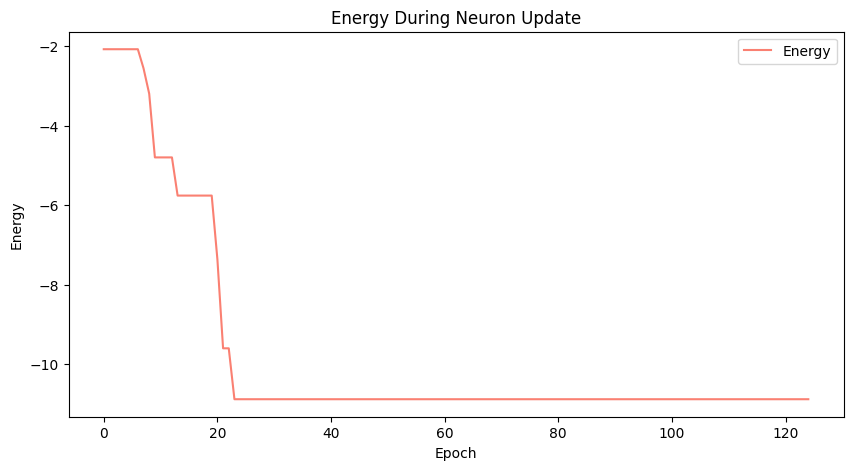

-10.72
-10.88


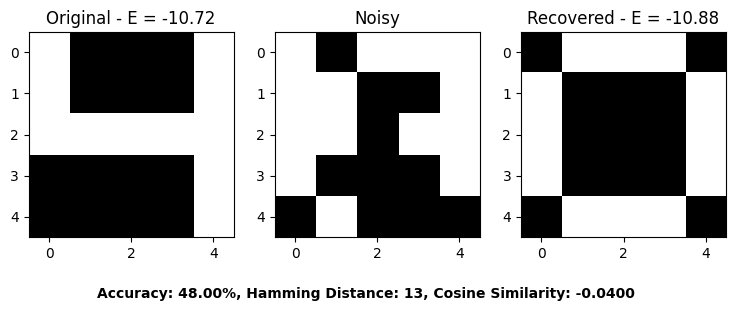

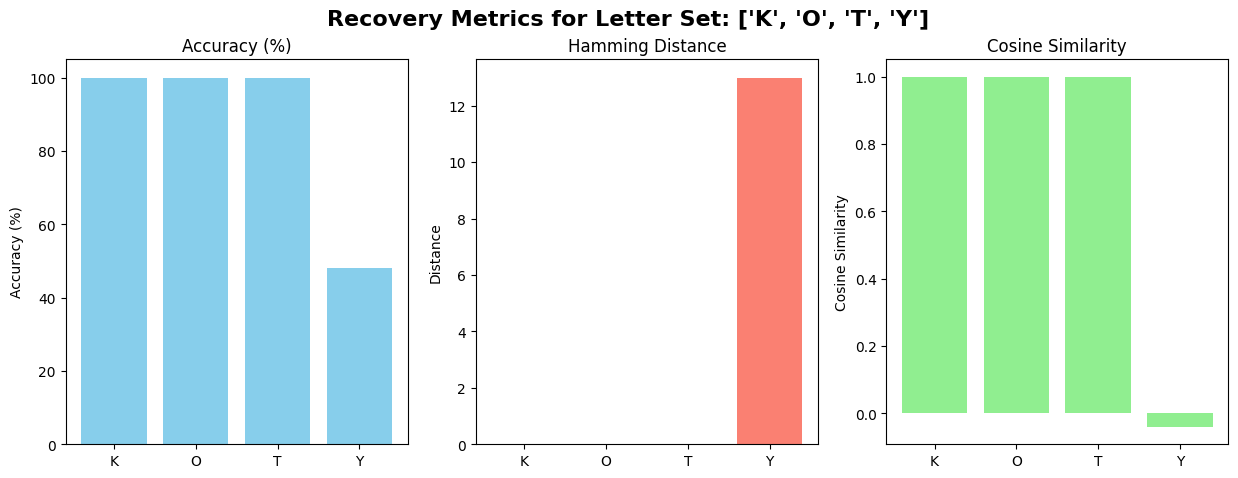


=================== Analyzing set: ['F', 'T', 'U', 'Z']
Pattern 'F' recovery metrics:
  - Accuracy: 84.00%
  - Hamming Distance: 4
  - Cosine Similarity: 0.6800


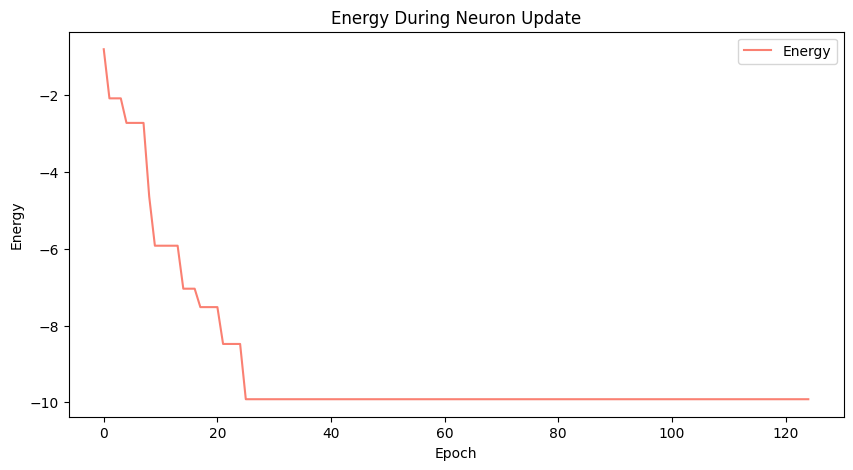

-11.520000000000001
-9.92


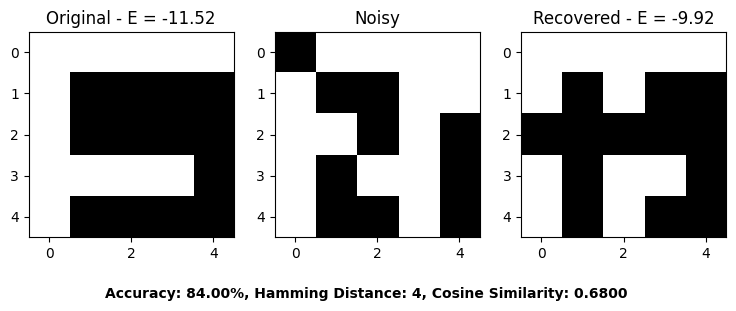

Pattern 'T' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


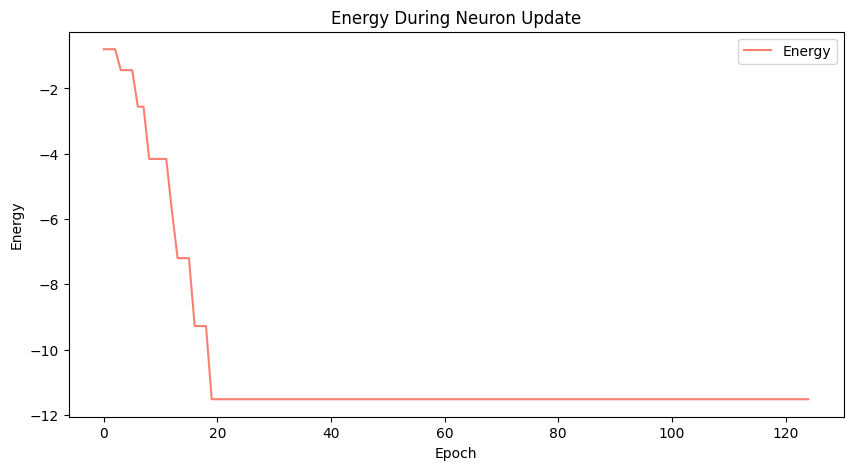

-11.520000000000001
-11.520000000000001


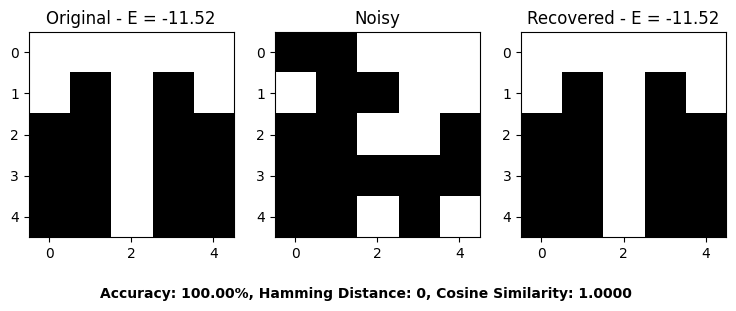

Pattern 'U' recovery metrics:
  - Accuracy: 84.00%
  - Hamming Distance: 4
  - Cosine Similarity: 0.6800


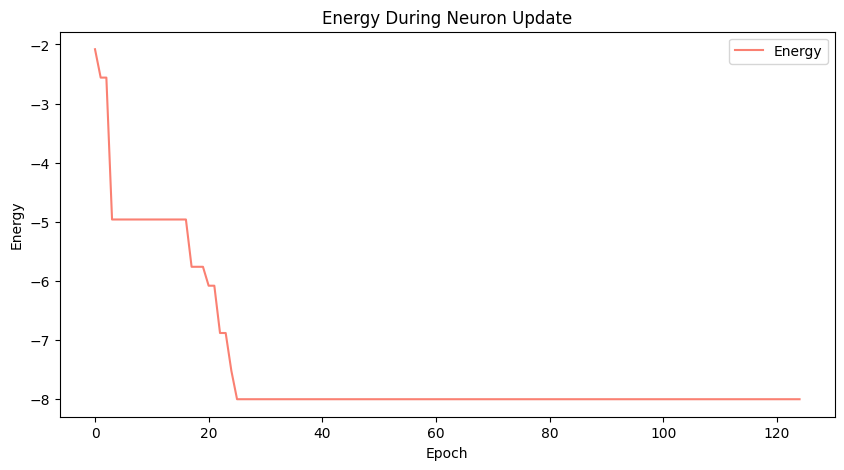

-10.56
-8.000000000000002


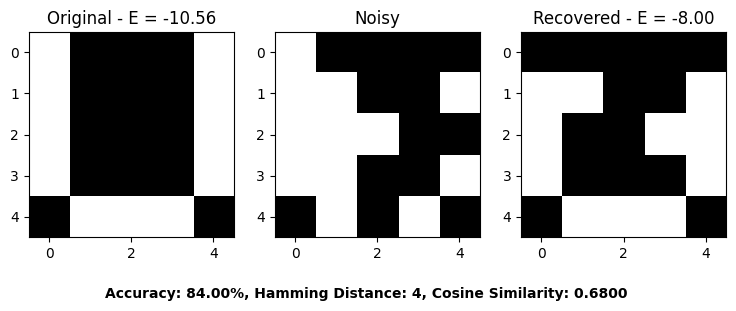

Pattern 'Z' recovery metrics:
  - Accuracy: 100.00%
  - Hamming Distance: 0
  - Cosine Similarity: 1.0000


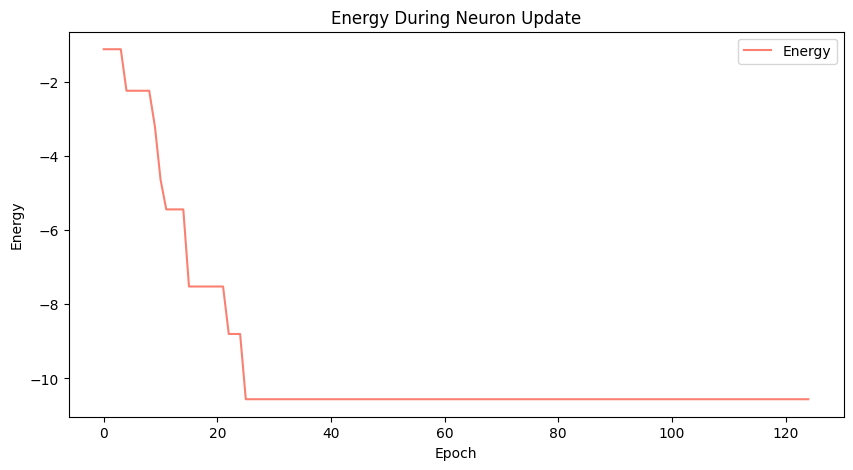

-10.560000000000002
-10.560000000000002


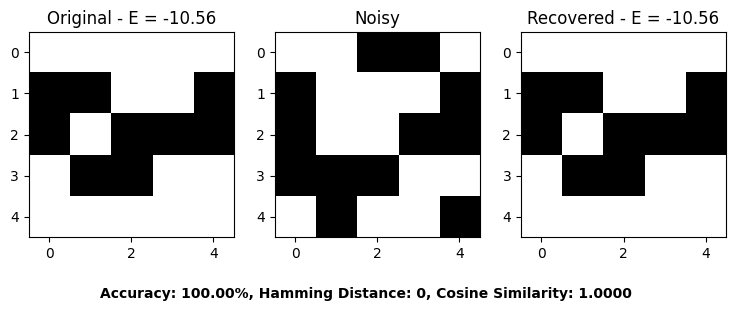

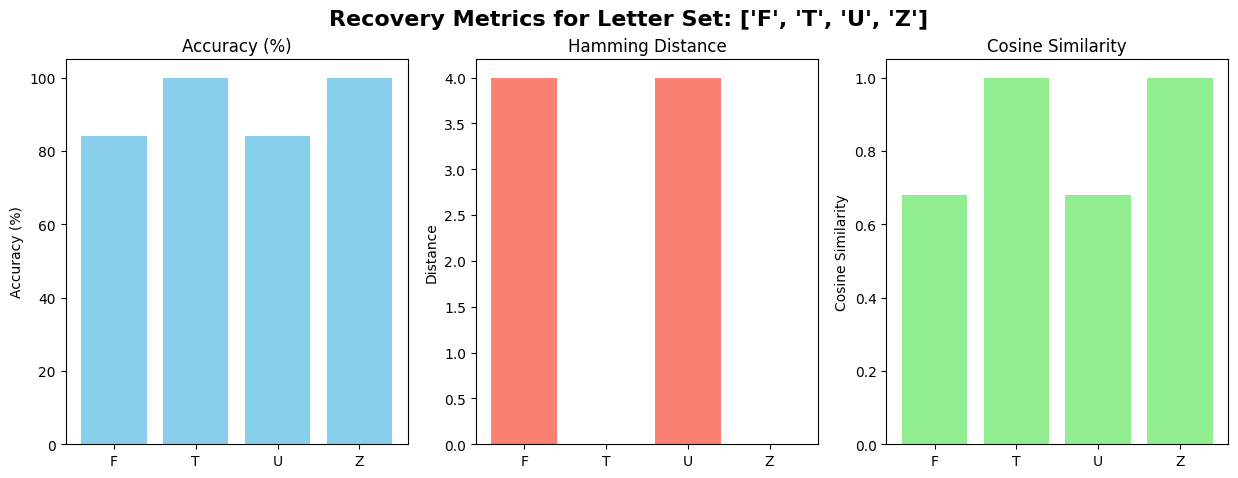


=================== Analyzing set: ['A', 'T', 'Y', 'Z']
Pattern 'A' recovery metrics:
  - Accuracy: 72.00%
  - Hamming Distance: 7
  - Cosine Similarity: 0.4400


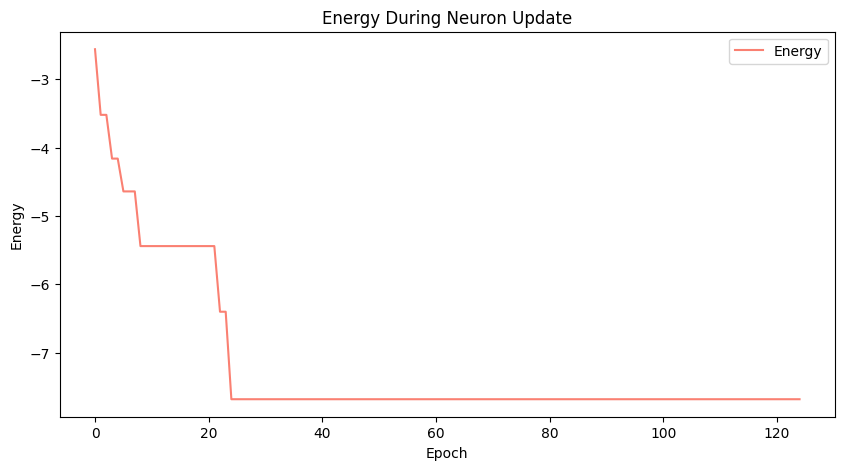

-10.56
-7.68


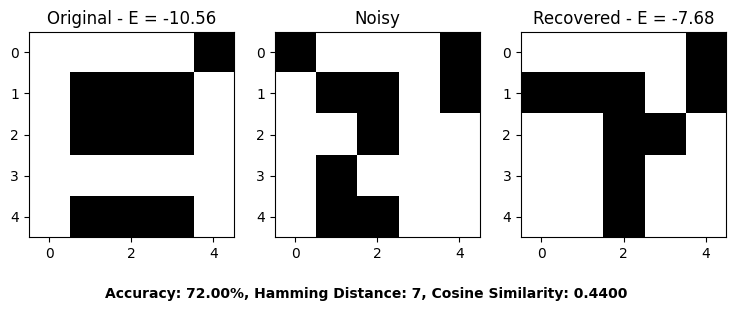

Pattern 'T' recovery metrics:
  - Accuracy: 68.00%
  - Hamming Distance: 8
  - Cosine Similarity: 0.3600


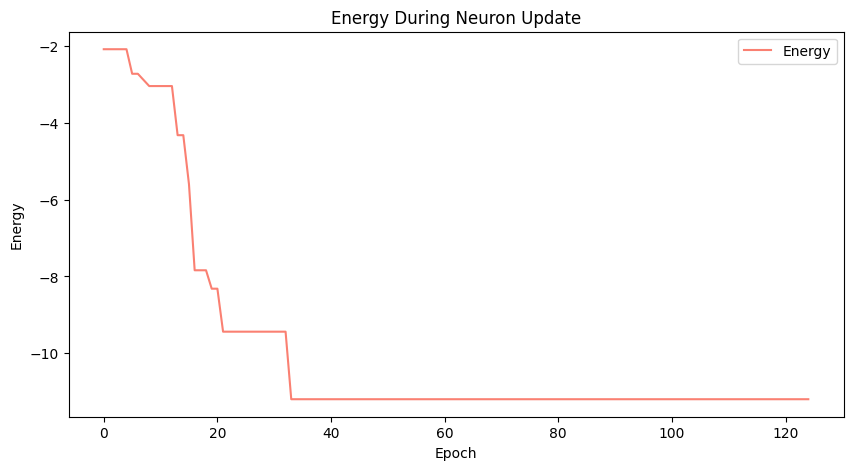

-10.560000000000002
-11.200000000000001


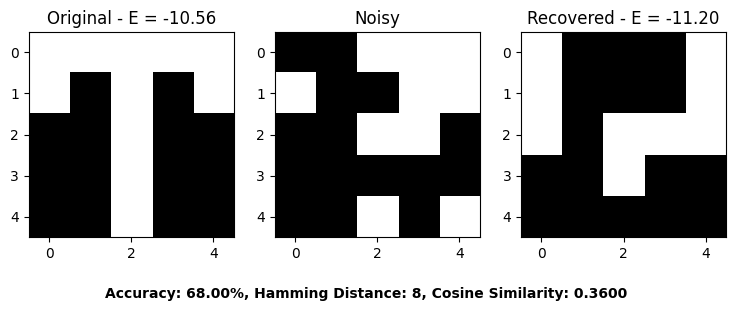

Pattern 'Y' recovery metrics:
  - Accuracy: 84.00%
  - Hamming Distance: 4
  - Cosine Similarity: 0.6800


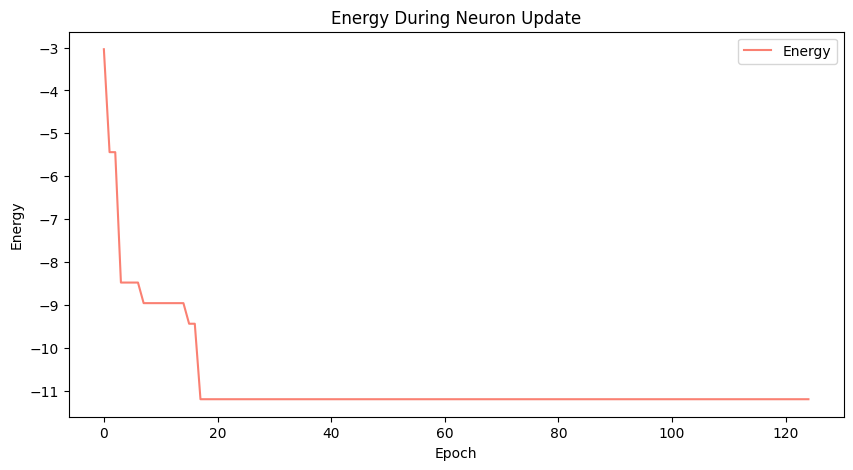

-12.16
-11.200000000000001


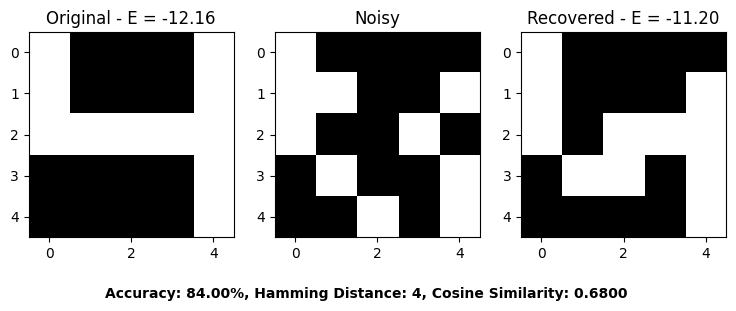

Pattern 'Z' recovery metrics:
  - Accuracy: 84.00%
  - Hamming Distance: 4
  - Cosine Similarity: 0.6800


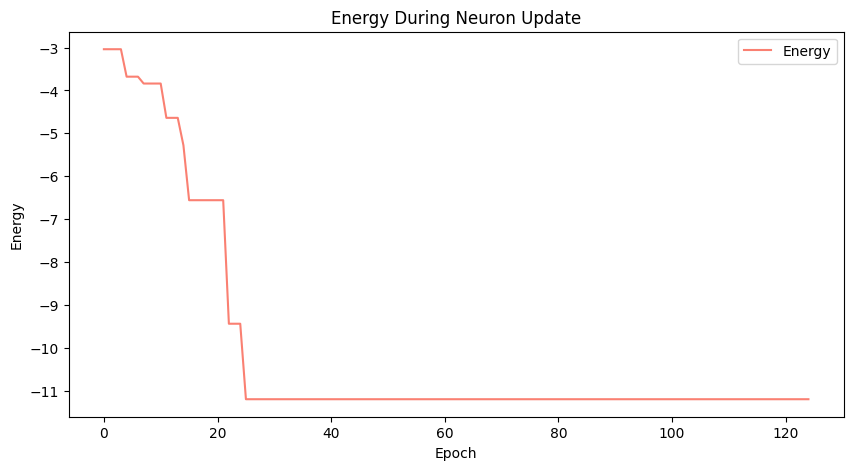

-12.160000000000002
-11.200000000000001


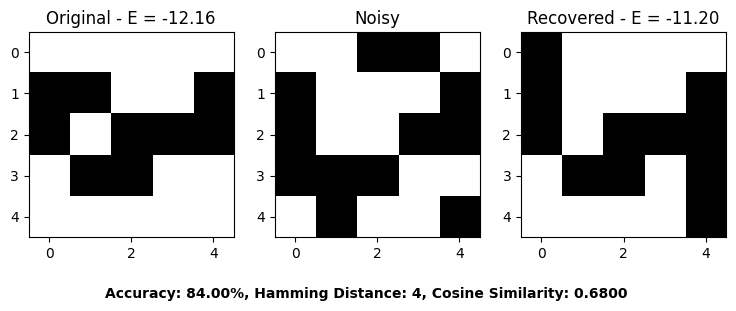

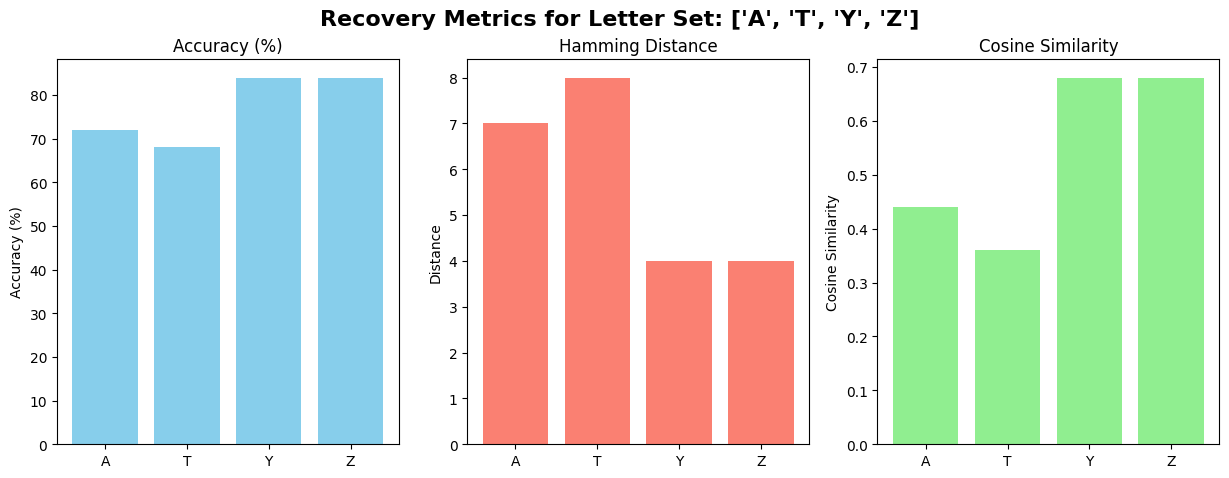

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from core.hopfield import Hopfield
np.random.seed(42)

# Metric calculation function
def recovery_metrics(original_pattern, recovered_pattern):
    # Reconstruction accuracy
    accuracy = np.sum(original_pattern == recovered_pattern) / len(original_pattern) * 100

    # Hamming distance
    hamming_distance = np.sum(original_pattern != recovered_pattern)

    # Cosine similarity
    cosine_similarity = np.dot(original_pattern, recovered_pattern) / (np.linalg.norm(original_pattern) * np.linalg.norm(recovered_pattern))
    
    return accuracy, hamming_distance, cosine_similarity


def energy_evolution(hopfield_net):
    # Plot energy over epochs
    epochs = range(len(hopfield_net.energy_history))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, hopfield_net.energy_history, label="Energy", color="salmon")
    plt.xlabel("Epoch")
    plt.ylabel("Energy")
    plt.title("Energy During Neuron Update")
    plt.legend()
    plt.show()

# Define the letter sets
letter_sets = [
    ['A', 'K', 'T', 'U'],
    ['B', 'C', 'E', 'G'],
    ['K', 'O', 'T', 'Y'],
    ['F', 'T', 'U', 'Z'],
    ['A', 'T', 'Y', 'Z']
]

# Process each set of letters
for letter_set in letter_sets:
    print(f"\n=================== Analyzing set: {letter_set}")
    
    # Extract patterns
    patterns = [flat_letters[letter] for letter in letter_set]
    
    # Train Hopfield network
    n_neurons = patterns[0].size
    hopfield_net = Hopfield(n_neurons)
    hopfield_net.train(patterns)


    # Initialize lists to store metrics for each letter
    accuracies = []
    hamming_distances = []
    cosine_similarities = []

    # Test recall for each pattern
    for idx, pattern in enumerate(patterns):
        # Introduce noise
        noisy_pattern = pattern.copy()
        noise_level = 0.3
        n_flip = int(noise_level * n_neurons)
        flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
        noisy_pattern[flip_indices] *= -1

        # Update network to recall pattern
        recovered_pattern, _ = hopfield_net.update(noisy_pattern)
        
        
        
        # Calculate recovery metrics
        accuracy, hamming_distance, cosine_similarity = recovery_metrics(pattern, recovered_pattern)
        
        # Store metrics
        accuracies.append(accuracy)
        hamming_distances.append(hamming_distance)
        cosine_similarities.append(cosine_similarity)

        # Print metrics for each pattern
        print(f"Pattern '{letter_set[idx]}' recovery metrics:")
        print(f"  - Accuracy: {accuracy:.2f}%")
        print(f"  - Hamming Distance: {hamming_distance}")
        print(f"  - Cosine Similarity: {cosine_similarity:.4f}")

        energy_evolution(hopfield_net)

        # Visualize original, noisy, and recovered patterns with metrics below
        fig, axs = plt.subplots(1, 3, figsize=(9, 3))
        axs[0].imshow(pattern.reshape(5, 5), cmap='gray')
        axs[0].set_title('Original - E = {:.2f}'.format(hopfield_net.energy(pattern)))
        axs[1].imshow(noisy_pattern.reshape(5, 5), cmap='gray')
        axs[1].set_title('Noisy')
        axs[2].imshow(recovered_pattern.reshape(5, 5), cmap='gray')
        axs[2].set_title('Recovered - E = {:.2f}'.format(hopfield_net.energy(recovered_pattern)))

        print(hopfield_net.energy(pattern))
        print(hopfield_net.energy(recovered_pattern))
        # Add metrics as text below the images
        fig.text(0.5, -0.05, f"Accuracy: {accuracy:.2f}%, Hamming Distance: {hamming_distance}, Cosine Similarity: {cosine_similarity:.4f}",
                 ha='center', fontsize=10, transform=fig.transFigure, weight='bold')
        
        plt.show()

    # Plot summary metrics for each letter in the set
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    x = range(len(letter_set))

    # Accuracy Plot
    ax[0].bar(x, accuracies, color='skyblue')
    ax[0].set_title("Accuracy (%)")
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(letter_set)
    ax[0].set_ylabel("Accuracy (%)")

    # Hamming Distance Plot
    ax[1].bar(x, hamming_distances, color='salmon')
    ax[1].set_title("Hamming Distance")
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(letter_set)
    ax[1].set_ylabel("Distance")

    # Cosine Similarity Plot
    ax[2].bar(x, cosine_similarities, color='lightgreen')
    ax[2].set_title("Cosine Similarity")
    ax[2].set_xticks(x)
    ax[2].set_xticklabels(letter_set)
    ax[2].set_ylabel("Cosine Similarity")

    # Show plot with title
    fig.suptitle(f"Recovery Metrics for Letter Set: {letter_set}", fontsize=16, weight='bold')
    plt.show()


- dentro de cosas con promedio bajo, afecta mas que hay a dos parecidas o es preferible tener muchos parecidos.
- tenes un promedio mas bajo pero con maximo mas alto contra un promedio mas alto pero con maximo más bajo
- encontrar 2 o 3 grupos que valgan la pena analizar
- analisis de ortogonalidad
- funcion de energia
- limitaciones de hopfield

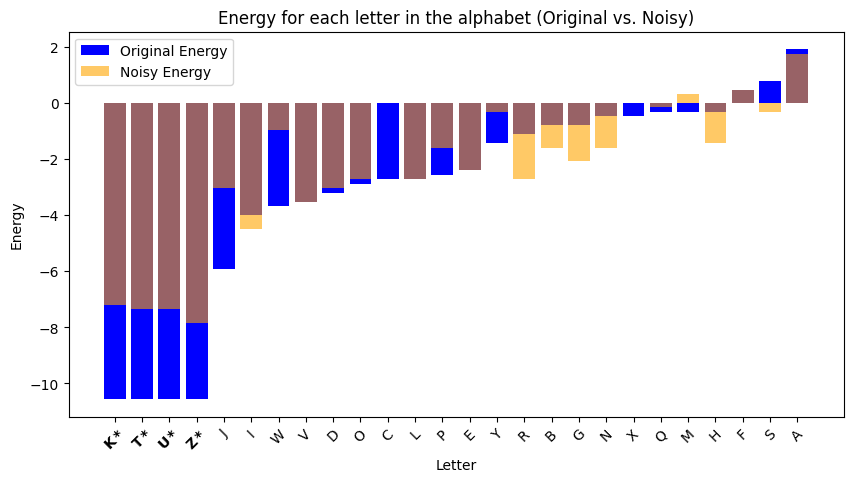

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the group of stored patterns
group_bceg = [letters[letter] for letter in "KTUZ"]

# Initialize the Hopfield network and train it
n_neurons = 25
hopfield_net = Hopfield(n_neurons)
hopfield_net.train(group_bceg)

# Calculate the energy for each letter in the alphabet (original patterns)
energies = {letter: hopfield_net.energy(grid.flatten()) for letter, grid in letters.items()}

# Add noise to each letter and calculate the energy of noisy patterns
noise_level = 0.1  # 10% noise
noisy_energies = {}
for letter, grid in letters.items():
    # Flatten the pattern and introduce noise
    noisy_pattern = grid.flatten().copy()
    n_flip = int(noise_level * n_neurons)  # Number of bits to flip
    flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
    noisy_pattern[flip_indices] *= -1
    
    # Calculate energy for the noisy pattern
    noisy_energies[letter] = hopfield_net.energy(noisy_pattern)

# Sort letters by original energy for consistent plotting
sorted_energies = sorted(energies.items(), key=lambda x: x[1])
sorted_noisy_energies = [noisy_energies[letter] for letter, _ in sorted_energies]

# Modify labels to make stored letters bold and add an asterisk
stored_letters = set("KTUZ")
x_labels = [
    f"$\\bf{{{letter}*}}$" if letter in stored_letters else letter 
    for letter, _ in sorted_energies
]

# Plot the energy for each letter (original and noisy)
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_energies], [x[1] for x in sorted_energies], color='blue', label="Original Energy")
plt.bar([x[0] for x in sorted_energies], sorted_noisy_energies, color='orange', alpha=0.6, label="Noisy Energy")
plt.xlabel("Letter")
plt.ylabel("Energy")
plt.title("Energy for each letter in the alphabet (Original vs. Noisy)")

# Set x-ticks with modified labels
plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.legend()
plt.show()


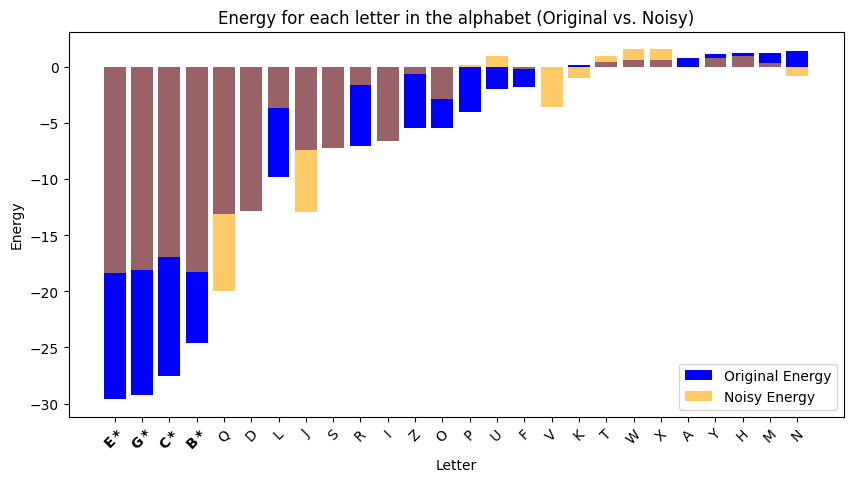

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the group of stored patterns
group_bceg = [letters[letter] for letter in "BCEG"]

# Initialize the Hopfield network and train it
n_neurons = 25
hopfield_net = Hopfield(n_neurons)
hopfield_net.train(group_bceg)

# Calculate the energy for each letter in the alphabet (original patterns)
energies = {letter: hopfield_net.energy(grid.flatten()) for letter, grid in letters.items()}

# Add noise to each letter and calculate the energy of noisy patterns
noise_level = 0.1  # 10% noise
noisy_energies = {}
for letter, grid in letters.items():
    # Flatten the pattern and introduce noise
    noisy_pattern = grid.flatten().copy()
    n_flip = int(noise_level * n_neurons)  # Number of bits to flip
    flip_indices = np.random.choice(n_neurons, n_flip, replace=False)
    noisy_pattern[flip_indices] *= -1
    
    # Calculate energy for the noisy pattern
    noisy_energies[letter] = hopfield_net.energy(noisy_pattern)

# Sort letters by original energy for consistent plotting
sorted_energies = sorted(energies.items(), key=lambda x: x[1])
sorted_noisy_energies = [noisy_energies[letter] for letter, _ in sorted_energies]

# Modify labels to make stored letters bold and add an asterisk
stored_letters = set("BCEG")
x_labels = [
    f"$\\bf{{{letter}*}}$" if letter in stored_letters else letter 
    for letter, _ in sorted_energies
]

# Plot the energy for each letter (original and noisy)
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_energies], [x[1] for x in sorted_energies], color='blue', label="Original Energy")
plt.bar([x[0] for x in sorted_energies], sorted_noisy_energies, color='orange', alpha=0.6, label="Noisy Energy")
plt.xlabel("Letter")
plt.ylabel("Energy")
plt.title("Energy for each letter in the alphabet (Original vs. Noisy)")

# Set x-ticks with modified labels
plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.legend()
plt.show()
